## Predictive Modelling in Retail
## Supervised & Unsupervised Machine Learning

- Source & Significance:

Sourced from the University of California at Irvine (UCI) Machine Learning Repository, one of many resources for getting access to real-world datasets.

This dataset involves detailed transactions from a UK-based online retail store that specializes in unique gift items, mainly selling to wholesale customers.

- Key Attributes & Timeframe:

Data includes a variety of attributes over two years, from December 2009 to December 2011.
 
The dataset includes: 

- InvoiceNo: A unique 6-digit identifier for transactions, with 'c' indicating cancellations.
    
- StockCode: A unique 5-digit identifier for products.
    
- Description: The name of each product.
    
- Quantity: Number of items per transaction.
    
- InvoiceDate: Date and time when a transaction occurred.
    
- Price: Price per item/unit in pounds sterling.
    
- Customer ID: A unique 5-digit identifier for customers.
    
- Country: The residence country of the customer.

## Goal:

The retail store is looking to increase its revenue. Therefore:

- The project's goal is to get deep insights into sales trends and customer behavior to inform strategic decision-making.

- The model aims to forecast annual revenue using a time series model known as Holt-Winters, enabling the retailer to plan better for the future.

- By segmenting customers usign RFM (Recency, Frequency, Monetary) Analysis, this model strives to personalize marketing strategies and enhance customer engagement.

- This analysis ultimately is expected to pave the way for annual revenue growth and an enhanced understanding of market dynamics.

In [1]:
# Import libraries needed: 

import warnings                      # To ignore warnings
warnings.filterwarnings('ignore')

import pandas as pd                  # Data Analysis, Manipulation, Cleaning, etc.

import numpy as np                   # Linear Algebra Library


# For clustering 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA  # for data reduction

# For data visualization

import matplotlib.pyplot as plt      # Basic 2D Plotting Library
import seaborn as sns                # Statistical Plotting Library

# For interactive plots

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline 

import re
import datetime as dt
from datetime import datetime
from scipy import stats

In [2]:
# Load first sheet of data and display first few rows

df1 = pd.read_excel(r"C:\Users\Aya K\Desktop\Capstone Project\online_retail_II.xlsx")
df1.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [3]:
df1.tail()

Invoice StockCode                         Description  Quantity  \
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931              JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom

In [4]:
print(df1['InvoiceDate'].min())
print(df1['InvoiceDate'].max())

2009-12-01 07:45:00
2010-12-09 20:01:00


In [5]:
# second sheet

df2 = pd.read_excel(r"C:\Users\Aya K\Desktop\Capstone Project\online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df2.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom

In [6]:
df2.tail()

Invoice StockCode                      Description  Quantity  \
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID Country  
541905 2011-12-09 12:50:00   2.10      12680.0  France  
541906 2011-12-09 12:50:00   4.15      12680.0  France  
541907 2011-12-09 12:50:00   4.15      12680.0  France  
541908 2011-12-09 12:50:00   4.95      12680.0  France  
541909 2011-12-09 12:50:00  18.00      12680.0  France

In [7]:
print(df2['InvoiceDate'].min())
print(df2['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [8]:
# Merge sheets in one df to include all years

df = pd.concat([df1, df2])
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [9]:
df.tail()

Invoice StockCode                      Description  Quantity  \
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID Country  
541905 2011-12-09 12:50:00   2.10      12680.0  France  
541906 2011-12-09 12:50:00   4.15      12680.0  France  
541907 2011-12-09 12:50:00   4.15      12680.0  France  
541908 2011-12-09 12:50:00   4.95      12680.0  France  
541909 2011-12-09 12:50:00  18.00      12680.0  France

In [10]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#

- Dataset has 1067371 rows and 8 columns
- Missing values found in Customer ID & Product Description
- It is worthy to convert Customer ID's data type to a character or object instead of being interpreted as float.

# Data Cleaning

In [12]:
# Check for empty fields 

df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [13]:
# Check for duplicates

df.duplicated().sum()

34335

In [14]:
# Remove NULLs

df.dropna(subset=['Customer ID'], inplace=True)

In [15]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


# 

- Notice that removing Nulls from Customer ID alligned with the NULLs found in Product DSC
- Data went down to 797885 rows now.

In [17]:
# Double check

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
# Remove invoices that start with 'C', indicating cancelled orders/transactions

df = df[~df['Invoice'].str.startswith('C', na=False)]

In [20]:
# Dataset now has 779495 rows after cleaning all that is needed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  float64       
 7   Country      779495 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.5+ MB


In [21]:
# Covert Customer ID to an object dtype

df['Customer ID'] = df['Customer ID'].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  object        
 7   Country      779495 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 53.5+ MB


## 

So far, we:

- Eliminated records with missing or NULL “Description” or “Customer ID” fields, as well as ~34k duplicate records.

- Filtered out all canceled transactions. These were identifiable by an “InvoiceNo” beginning with “C”. This step ensures that our dataset only reflects completed sales.

- Converted the “Customer ID” from a numerical float to a string object. This change is crucial for accurate categorization as IDs are identifiers, not quantities.

- Next step will include: Feature engineering of a new column, “Revenue”. This attribute is calculated by multiplying “Price” and “Quantity”. It offers an additional layer for our analysis, sales performance at the transaction level.

## Analysis

In [23]:
df.describe(include=object)

Invoice StockCode                         Description Customer ID  \
count    779495    779495                              779495      779495   
unique    36975      4631                                5283        5881   
top      576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER     17841.0   
freq        542      5023                                5016       12435   

               Country  
count           779495  
unique              41  
top     United Kingdom  
freq            700434

# 

- There are 36,975 unique invoices and 5881 uniques Customer IDs.

- There are 4,631 unique stock codes, which indicates the variety of products being sold. The most frequent stock code is 85123A, occurring 5,023 times, suggesting it is a very popular or commonly reordered item. This code corresponds to the "WHITE HANGING HEART T-LIGHT HOLDER" product.

- There are 41 unique country entries in the dataset, with the 'United Kingdom' being the most frequent country listed. This suggests that the dataset is heavily skewed towards the UK market, as it appears 700,434 times out of 779,495 entries which makes sense since the store is UK-based.

In [24]:
# Check to see all distinct countries are in the dataset

df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [25]:
df.describe().T

count       mean         std  min   25%   50%    75%      max
Quantity  779495.0  13.507085  146.540284  1.0  2.00  6.00  12.00  80995.0
Price     779495.0   3.218199   29.674823  0.0  1.25  1.95   3.75  10953.5

# 

- It seems like there are potential outliers due to high std.

- On average, each line item on the invoices includes about 13 items, but there is a very high standard deviation, suggesting there is significant variability in order size/quantity.

- There is also high variability in the prices of the products offered.

Text(0.5, 1.0, 'Quantity Distribution')

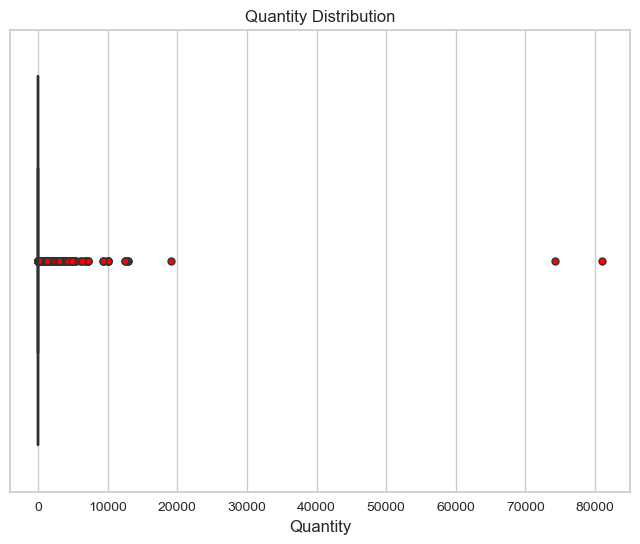

In [26]:
# boxplot for 'Quantity'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Quantity Distribution')

Text(0.5, 1.0, 'Price Distribution')

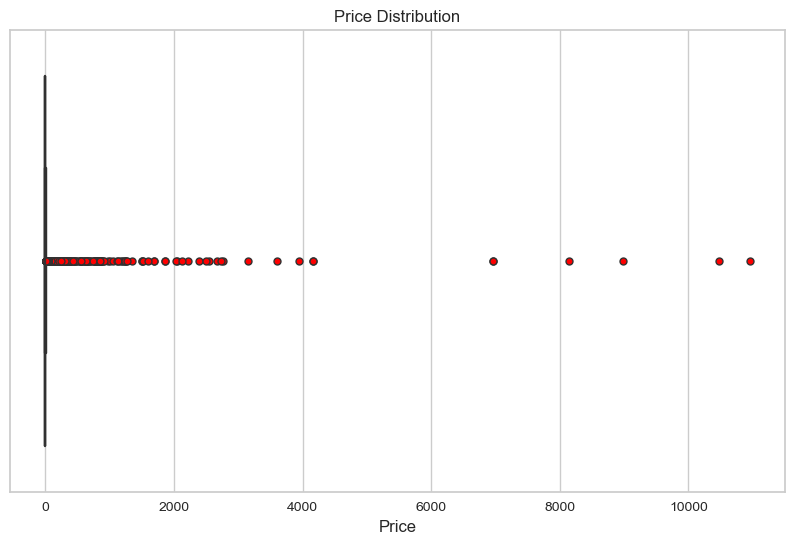

In [27]:
# boxplot for 'Price'

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Price Distribution')

# 

- Both Quantity and Price distributions are extremely right-skewed with a concentration of data near the lower end and outliers that suggest high-quantity/high-price transactions.

- The extreme outliers in both plots could potentially distort any predictive models and might need to be addressed through further data cleaning or transformation.

In [28]:
df_transformed = df.copy()

In [29]:
df_transformed.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

In [30]:
skewed_cols = ['Quantity', 'Price']

# Applying the Box-Cox transformation and overwriting the columns
for col in skewed_cols:
    # Apply Box-Cox transformation
    df_transformed[col], fitted_lambda = stats.boxcox(df[col] + 1 - df[col].min())
    print(f"Fitted Lambda for {col}: {fitted_lambda}")

Fitted Lambda for Quantity: -0.15818977777916324
Fitted Lambda for Price: -0.5139244435400433


In [31]:
df_transformed.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS  2.054683   
1  489434    79323P                   PINK CHERRY LIGHTS  2.054683   
2  489434    79323W                  WHITE CHERRY LIGHTS  2.054683   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE   2.894897   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX  2.497799   

          InvoiceDate     Price Customer ID         Country  
0 2009-12-01 07:45:00  1.275340     13085.0  United Kingdom  
1 2009-12-01 07:45:00  1.266503     13085.0  United Kingdom  
2 2009-12-01 07:45:00  1.266503     13085.0  United Kingdom  
3 2009-12-01 07:45:00  0.857939     13085.0  United Kingdom  
4 2009-12-01 07:45:00  0.663169     13085.0  United Kingdom

Text(0.5, 1.0, 'Price Distribution')

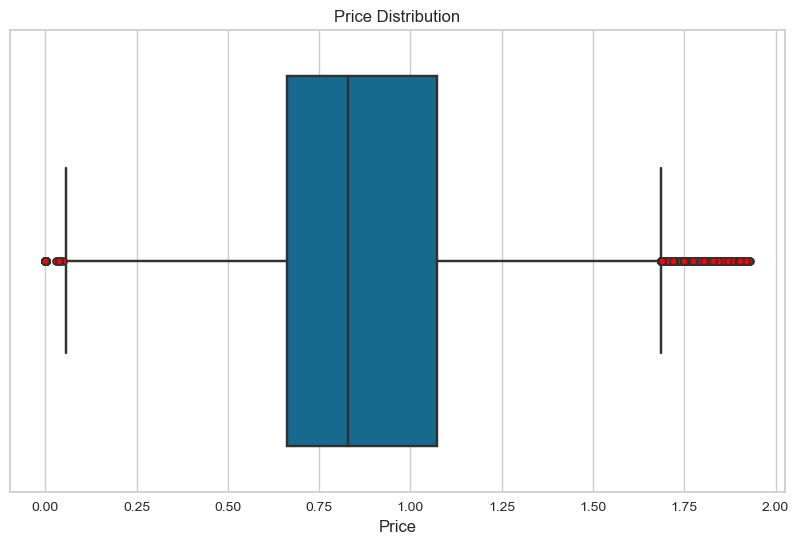

In [32]:
# boxplot for 'Price'

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_transformed['Price'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Price Distribution')

Text(0.5, 1.0, 'Quantity Distribution')

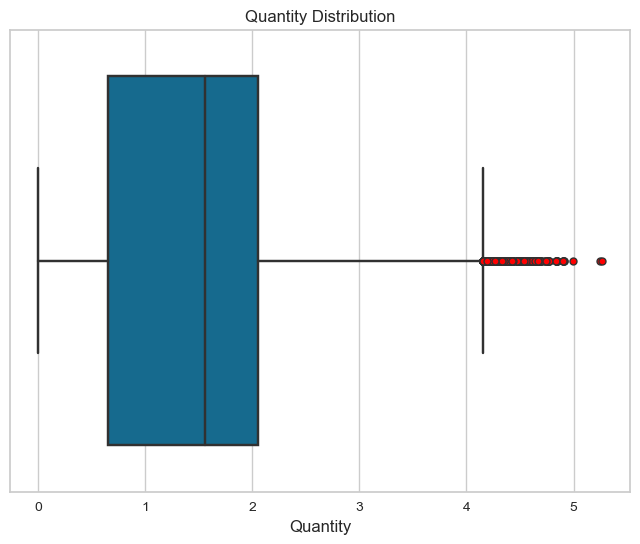

In [33]:
# boxplot for 'Quantity'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_transformed['Quantity'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Quantity Distribution')

#

- Applied the Box-Cox method to adjust the scales of the data to reduce skewness. The λ parameters below indicate that the data required a moderate transformation to approach a normal distribution.

- As we can see from the plot, after transformation, the data might still have some outliers, but they are less extreme compared to the original data. 

## Feature Engineering

In [34]:
df_transformed["Revenue"] = df_transformed["Quantity"] * df_transformed["Price"]

In [35]:
df_transformed.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS  2.054683   
1  489434    79323P                   PINK CHERRY LIGHTS  2.054683   
2  489434    79323W                  WHITE CHERRY LIGHTS  2.054683   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE   2.894897   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX  2.497799   

          InvoiceDate     Price Customer ID         Country   Revenue  
0 2009-12-01 07:45:00  1.275340     13085.0  United Kingdom  2.620420  
1 2009-12-01 07:45:00  1.266503     13085.0  United Kingdom  2.602263  
2 2009-12-01 07:45:00  1.266503     13085.0  United Kingdom  2.602263  
3 2009-12-01 07:45:00  0.857939     13085.0  United Kingdom  2.483645  
4 2009-12-01 07:45:00  0.663169     13085.0  United Kingdom  1.656463

In [36]:
df_transformed['InvoiceDate'] = pd.to_datetime(df_transformed['InvoiceDate'])

In [37]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  float64       
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  object        
 7   Country      779495 non-null  object        
 8   Revenue      779495 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 59.5+ MB


## Continue Analysis

In [38]:
numeric_df = df_transformed.select_dtypes(include=[np.number])

corr = numeric_df.corr()

[Text(0.5, 1.0, 'Numerical Correlation Analysis')]

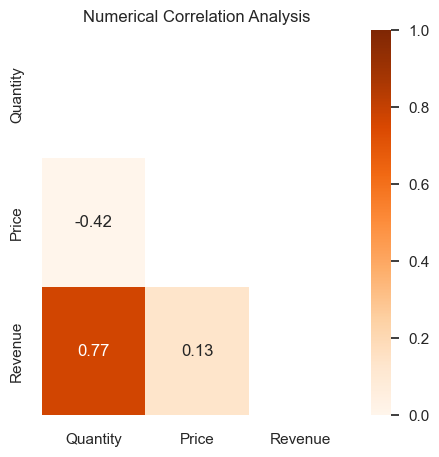

In [39]:
# Generate a mask for the upper triangle to avoid redundancy

sns.set_theme(style="white", color_codes=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask=mask, cmap = 'Oranges', vmin=0, vmax=1, annot=True).set(title='Numerical Correlation Analysis')

#

- Quantity has high correlation with Total Rev/Sales which is expected. 

- Unit price has a moderately high correlation with Sales as well. A very slight positive trend where higher prices might be associated with higher revenue, but the relationship is not strong.

- There's a slightly negative correlation of -0.16 between Quantity and Price. This suggests that as the quantity of items sold increases, there may be a slight tendency for the price to decrease, or vice versa. However, this correlation is quite weak.

# Product Analysis

Text(0, 0.5, 'Product Description')

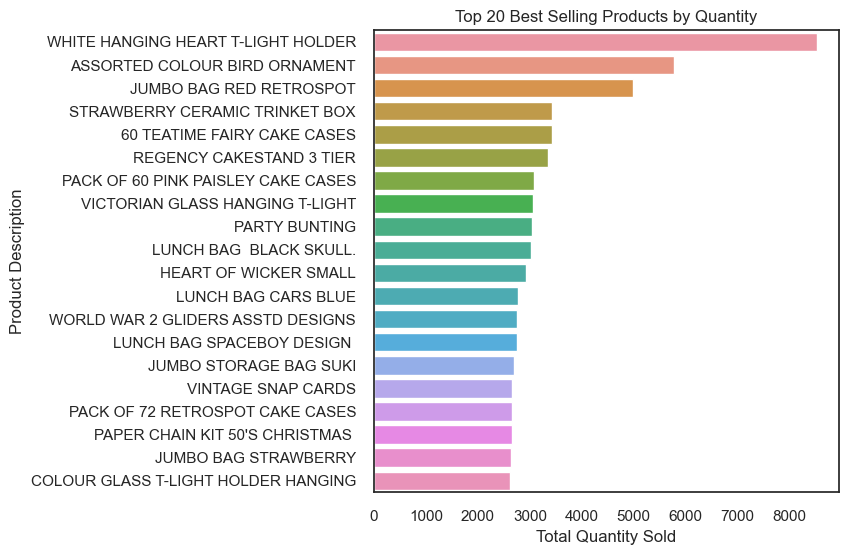

In [40]:
# Best selling products by quantity sold
best_selling = df_transformed.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)

# Products with the highest total revenue
most_rev = df_transformed.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(6, 6))
sns.barplot(x=best_selling.values, y=best_selling.index)
plt.title('Top 20 Best Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')

Text(0, 0.5, 'Product Description')

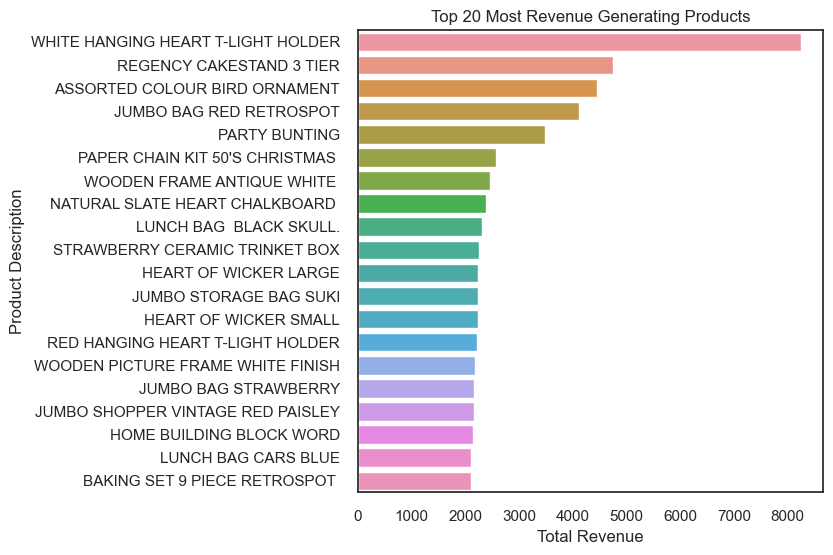

In [41]:
plt.figure(figsize=(6, 6))
sns.barplot(x=most_rev.values, y=most_rev.index)
plt.title('Top 20 Most Revenue Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')

In [42]:
# determine which countries after UK have the highest total order quantities & total sales

country1 = df_transformed.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

country2 = df_transformed.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Country')

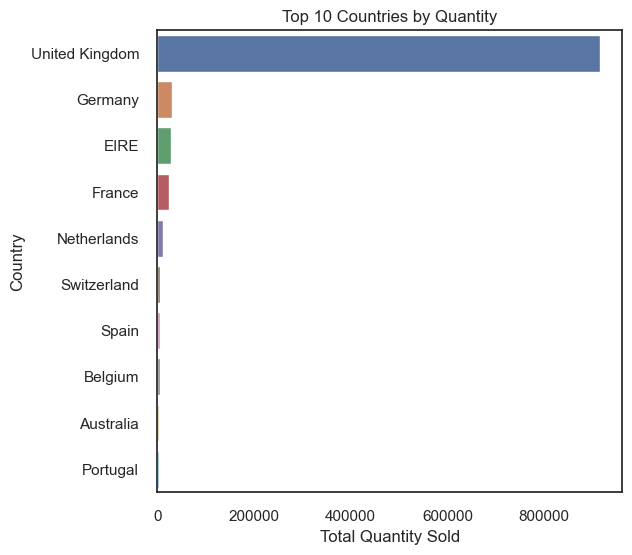

In [43]:
plt.figure(figsize=(6, 6))
sns.barplot(x=country1.values, y=country1.index)
plt.title('Top 10 Countries by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

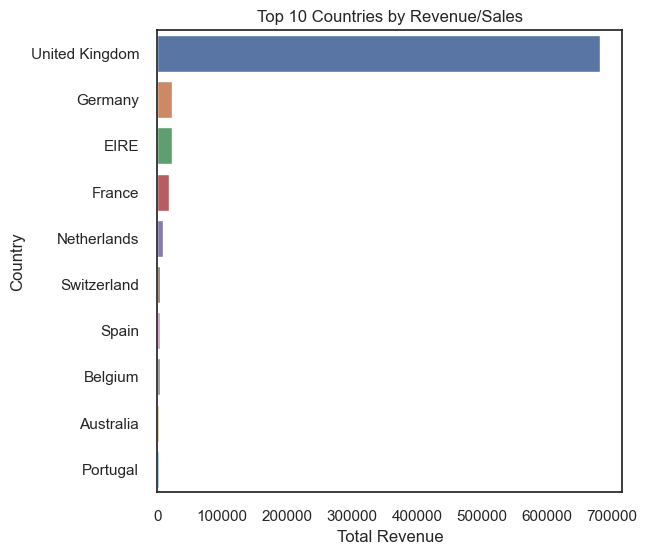

In [44]:
plt.figure(figsize=(6, 6))
sns.barplot(x=country2.values, y=country2.index)
plt.title('Top 10 Countries by Revenue/Sales')
plt.xlabel('Total Revenue')
plt.ylabel('Country')

# Time Series Analysis

In [45]:
df_transformed['InvoiceDate'] = pd.to_datetime(df_transformed['InvoiceDate']).dt.date
df_transformed.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS  2.054683   
1  489434    79323P                   PINK CHERRY LIGHTS  2.054683   
2  489434    79323W                  WHITE CHERRY LIGHTS  2.054683   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE   2.894897   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX  2.497799   

  InvoiceDate     Price Customer ID         Country   Revenue  
0  2009-12-01  1.275340     13085.0  United Kingdom  2.620420  
1  2009-12-01  1.266503     13085.0  United Kingdom  2.602263  
2  2009-12-01  1.266503     13085.0  United Kingdom  2.602263  
3  2009-12-01  0.857939     13085.0  United Kingdom  2.483645  
4  2009-12-01  0.663169     13085.0  United Kingdom  1.656463

In [46]:
# Convert 'InvoiceDate' to datetime if it's not already
df_transformed['InvoiceDate'] = pd.to_datetime(df_transformed['InvoiceDate'])

# Set 'InvoiceDate' as the index
df_transformed.set_index('InvoiceDate', inplace=True)

In [47]:
# Resample the data on a monthly basis
monthly_sales = df_transformed.resample('M').agg({'Revenue':'sum', 'Quantity':'sum'})

monthly_sales

Revenue      Quantity
InvoiceDate                            
2009-12-31   30686.763563  39435.603956
2010-01-31   22575.973726  29740.428893
2010-02-28   23377.060658  30839.840540
2010-03-31   32173.947300  42797.816122
2010-04-30   28631.424498  37550.966321
2010-05-31   28833.369061  38322.684338
2010-06-30   30206.577936  40683.424992
2010-07-31   27450.031860  36810.017397
2010-08-31   27328.357241  37314.490485
2010-09-30   37379.568207  50161.525227
2010-10-31   49337.813580  65875.577200
2010-11-30   55831.263165  72991.740949
2010-12-31   25470.848184  32878.675288
2011-01-31   22092.918111  29533.802700
2011-02-28   20940.332543  27553.936951
2011-03-31   27911.204366  37329.965858
2011-04-30   22782.549860  31122.931382
2011-05-31   31117.802547  40660.289619
2011-06-30   27941.895974  37861.008126
2011-07-31   27234.185680  38149.806803
2011-08-31   29292.085126  40286.859230
2011-09-30   43374.243437  58820.627434
2011-10-31   47892.772283  64848.091638
2011-11-30   58083.732227  79037.540354
2011-12-31   16034.980337  22493.863369

Text(0.5, 1.0, 'Monthly Revenue Distribution')

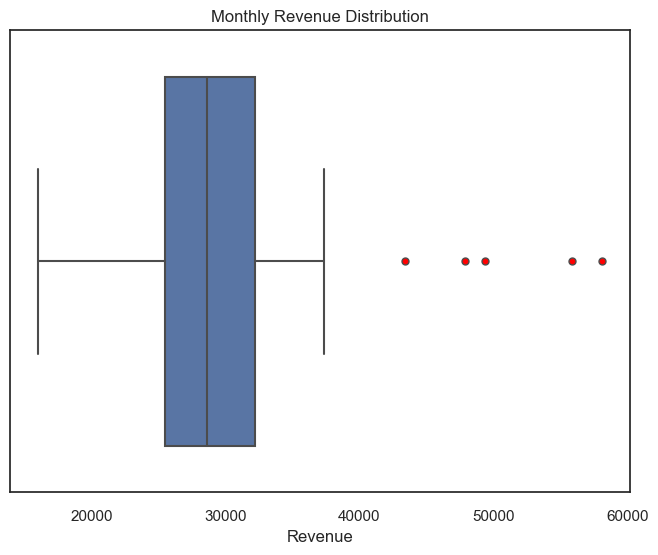

In [48]:
# Plot for Monthly Total Rev

plt.figure(figsize=(8, 6))
sns.boxplot(x=monthly_sales['Revenue'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Monthly Revenue Distribution')

Text(0.5, 1.0, 'Monthly Orders Sold Distribution')

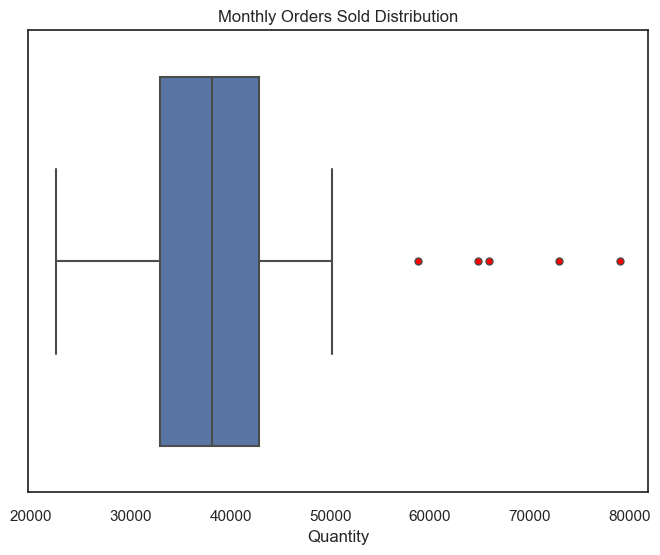

In [49]:
# Plot for Monthly Orders Sold

plt.figure(figsize=(8, 6))
sns.boxplot(x=monthly_sales['Quantity'], flierprops=dict(marker='o', markersize=5,  markerfacecolor = "red"))
plt.title('Monthly Orders Sold Distribution')

In [50]:
# Plot for Revenue by Month

fig = px.line(monthly_sales, x=monthly_sales.index, y='Revenue', title='Monthly Total Revenue')
fig.update_traces(line=dict(color='blue'))

In [51]:
# Plot for Orders by Month

fig = px.line(monthly_sales, x=monthly_sales.index, y='Quantity', title='Monthly Orders Sold')
fig.update_traces(line=dict(color='green'))

In [52]:
monthly_sales.to_csv(r"C:\Users\Aya K\Desktop\Capstone Project\Online Retail Store Monthly Sales.csv", index=False)

# 

- Both charts exhibit seasonality with peaks typically around the same time each year. These likely correspond to high-sales periods, such as holidays or promotional seasons.

In [53]:
# Aggregate the data by state and month

df_transformed = df_transformed.reset_index()

df_transformed['Month'] = df_transformed['InvoiceDate'].dt.to_period('M')

aggregated_df_transformed = df_transformed.groupby(['Country', 'Month']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

aggregated_df_transformed.head()

Country    Month    Revenue   Quantity
0  Australia  2009-12  20.816879  27.241694
1  Australia  2010-02  52.044499  66.781187
2  Australia  2010-03  29.794250  34.689861
3  Australia  2010-04  25.117745  36.073724
4  Australia  2010-05  79.304440  96.129343

In [54]:
map_df_transformed = aggregated_df_transformed.groupby('Country').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

map_df_transformed.head()

Country      Revenue     Quantity
0  Australia  3214.420911  4198.750375
1    Austria  1272.588964  1669.102103
2    Bahrain    84.835491   108.345430
3    Belgium  4057.085095  5301.928142
4     Brazil    80.238148    96.009140

In [55]:
df_transformed['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [56]:
fig = px.choropleth(map_df_transformed,
                    locations='Country', 
                    color='Revenue',  
                    hover_name='Country',  
                    hover_data=['Quantity'], 
                    locationmode='country names',
                    scope='world',
                    title='Revenue by Country',
                    color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [57]:
fig = px.choropleth(map_df_transformed,
                    locations='Country', 
                    color='Quantity',  
                    hover_name='Country',  
                    hover_data=['Revenue'], 
                    locationmode='country names',
                    scope='world',
                    title='Orders by Country',
                    color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [58]:
map_df_transformed['Avg Revenue per Order'] = map_df_transformed['Revenue'] / map_df_transformed['Quantity']

map_df_transformed.head()

Country      Revenue     Quantity  Avg Revenue per Order
0  Australia  3214.420911  4198.750375               0.765566
1    Austria  1272.588964  1669.102103               0.762439
2    Bahrain    84.835491   108.345430               0.783009
3    Belgium  4057.085095  5301.928142               0.765209
4     Brazil    80.238148    96.009140               0.835734

In [59]:
fig = px.choropleth(map_df_transformed,
                    locations='Country', 
                    color='Avg Revenue per Order',  
                    hover_name='Country',
                    hover_data=['Avg Revenue per Order'],  
                    locationmode='country names', 
                    scope='world', 
                    title='Average Order Total by State',
                   color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [60]:
df_transformed.to_csv(r"C:\Users\Aya K\Desktop\Capstone Project\Updated Online Retail Data.csv", index=False)

## 

With the information we have so far, the retail store is facing an issue in that: 

- United Kingdom: drives all sales and contributes to most of the revenue but has a very low average transaction size.
- All other countries: contribute much less to total revenue but have very high average transaction totals. 

Therefore, we will be splitting our customers into two groups:

- those who are only from the UK.
- those who are from any of the 40 other countries. 

After that, we will be proposing a marketing tool for each group known as the RFM (Recency, Frequency, Monetary) in hopes of resolving the issue.

## Holt-Winters Model Time Series Forecasting (check R code in repo):

- The store wants to increase its revenue, but the model predicts that it will most likely continue a similar pattern as the previous years.

- There is a 95% probability that the predicted revenue values for the next year will lie within the interval (light blue shaded area). A wider interval (like 95% CI) sacrifices some precision for increased certainty (only a 5% chance of being incorrect). Therefore, it provides a high level of confidence.

- MAE is equal to ~0.07 which indicates that the model’s predictions on average are generally close to the actual revenue values, making it reliable.

## RFM Customer Segmentation

- RFM analysis is conducted by assigning scores or rankings to each customer based on these three metrics (Recency, Frequency, Monetary) which are all based on customers' purchasing behavior.

- Customers are then grouped into segments based on their RFM scores. These segments can be utilized to tailor marketing strategies and campaigns to better target and serve the needs of different customer groups.

In [61]:
df_uk = df_transformed[df_transformed['Country'] == 'United Kingdom']

In [62]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 00:00:00')

In [63]:
# Max DTS in the dataset + 1 day (to calculate recency)

max_date = dt.datetime(2011,12,10)

In [64]:
# RFM
# Recency: how many days ago each customer made their last purchase.
# Frequency: Shows the number of unique transactions (or invoices) per customer.
# Monetary: Represents the total spending of each customer.

# Calculate RFM metrics for UK customers
rfm_uk = df_uk.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'Invoice': lambda x: x.nunique(),  # Frequency
    'Revenue': lambda x: x.sum()  # Monetary
}).rename(columns={'InvoiceDate': 'Recency',
                   'Invoice': 'Frequency', 
                   'Revenue': 'Monetary'})
rfm_uk.head()

Recency  Frequency    Monetary
Customer ID                                
12346.0          326         12   16.619564
12608.0          405          1   17.319997
12745.0          487          2   32.943165
12746.0          541          1   21.984476
12747.0            3         26  396.272899

## K-means for Clustering the Customers based on RFM

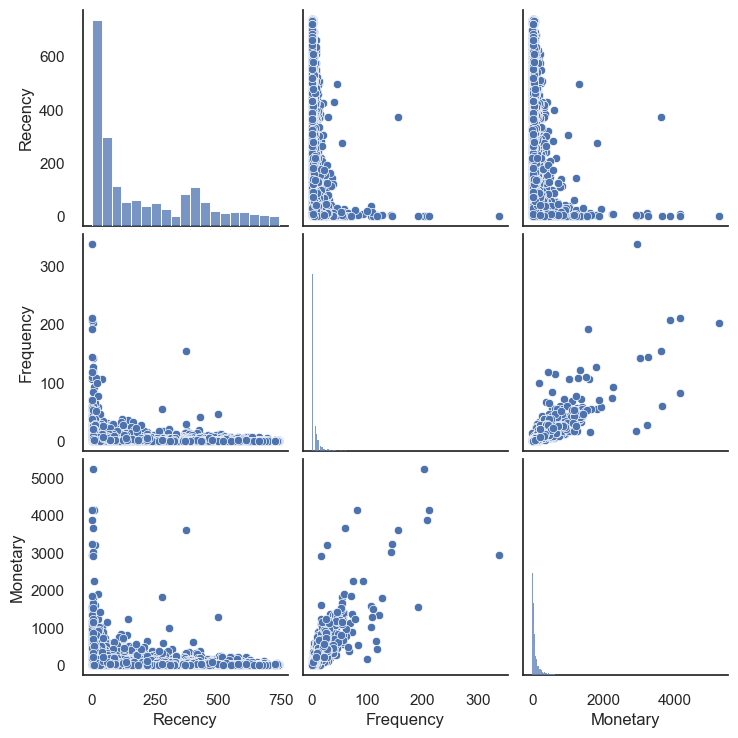

In [65]:
sns.pairplot(rfm_uk)

In [66]:
rfm_uk.describe()

Recency    Frequency     Monetary
count  5353.000000  5353.000000  5353.000000
mean    203.683729     6.266766   127.403101
std     210.120997    11.998015   255.398936
min       1.000000     1.000000     0.000000
25%      26.000000     1.000000    19.838089
50%      99.000000     3.000000    50.116999
75%     382.000000     7.000000   130.557663
max     739.000000   337.000000  5239.382917

In [67]:
rfm_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5353 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5353 non-null   int64  
 1   Frequency  5353 non-null   int64  
 2   Monetary   5353 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 296.3+ KB


<Axes: xlabel='Recency', ylabel='Density'>

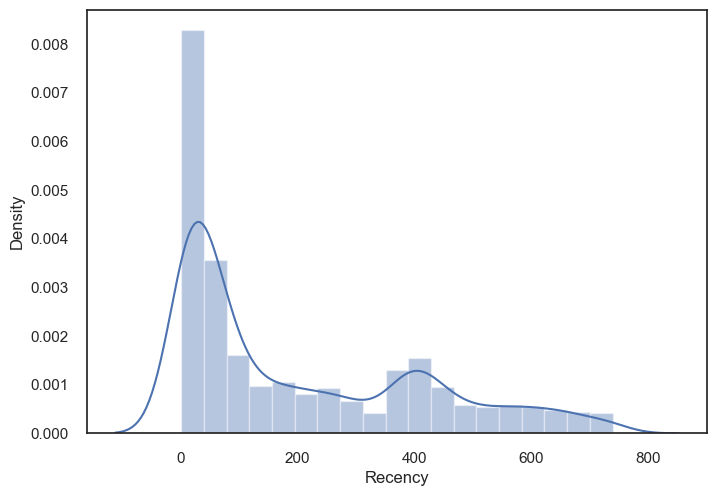

In [68]:
sns.distplot(rfm_uk['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

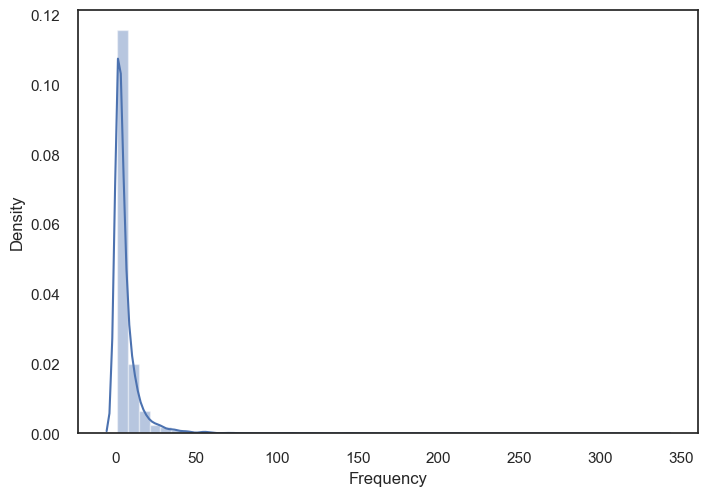

In [69]:
sns.distplot(rfm_uk['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

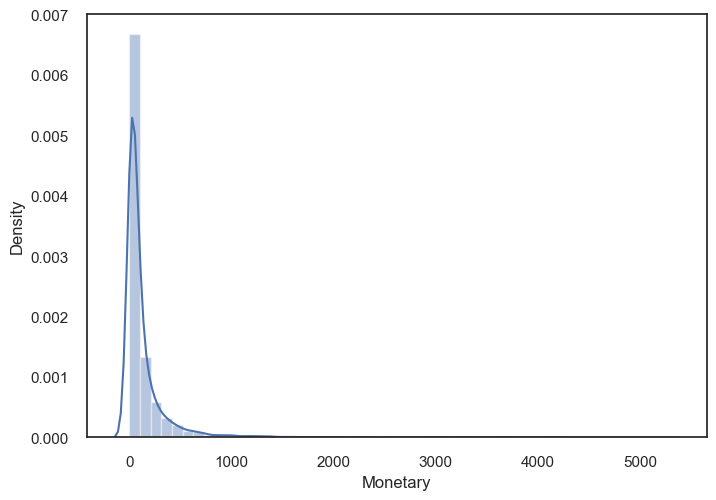

In [70]:
sns.distplot(rfm_uk['Monetary'])

In [71]:
skewed_columns = ['Recency', 'Frequency', 'Monetary']

for col in skewed_columns:
    rfm_uk[col] = rfm_uk[col] + 1 - rfm_uk[col].min()

    # Box-Cox 
    rfm_uk[f"{col}_BoxCox"], fitted_lambda = stats.boxcox(rfm_uk[col])
    print(f"Fitted Lambda for {col}: {fitted_lambda}")
    # A lambda value close to 1 indicates that little transformation was needed while values far from 1 indicate more extreme transformations.

Fitted Lambda for Recency: 0.19496546647415872
Fitted Lambda for Frequency: -0.2693344702980321
Fitted Lambda for Monetary: -0.0018399319918547313


In [72]:
rfm_uk.head()

Recency  Frequency    Monetary  Recency_BoxCox  Frequency_BoxCox  \
Customer ID                                                                     
12346.0          326         12   17.619564       10.721021          1.811570   
12608.0          405          1   18.319997       11.405955          0.000000   
12745.0          487          2   33.943165       12.011156          0.632291   
12746.0          541          1   22.984476       12.366186          0.000000   
12747.0            3         26  397.272899        1.225139          2.168999   

             Monetary_BoxCox  
Customer ID                   
12346.0             2.861451  
12608.0             2.900227  
12745.0             3.513283  
12746.0             3.125796  
12747.0             5.951795

In [73]:
rfm_uk.drop(['Recency', 'Frequency', 'Monetary'], axis=1, inplace=True)

In [74]:
rfm_uk.columns = rfm_uk.columns.str.replace('_BoxCox', '')

rfm_uk.head()

Recency  Frequency  Monetary
Customer ID                                
12346.0      10.721021   1.811570  2.861451
12608.0      11.405955   0.000000  2.900227
12745.0      12.011156   0.632291  3.513283
12746.0      12.366186   0.000000  3.125796
12747.0       1.225139   2.168999  5.951795

In [75]:
rfm_uk.describe()

Recency    Frequency     Monetary
count  5353.000000  5353.000000  5353.000000
mean      7.634343     0.931413     3.944933
std       3.640625     0.715882     1.336956
min       0.000000     0.000000     0.000000
25%       4.551731     0.000000     3.028314
50%       7.434722     0.950988     3.919913
75%      11.218543     1.514520     4.857607
max      13.463006     2.938518     8.497028

<Axes: xlabel='Monetary', ylabel='Density'>

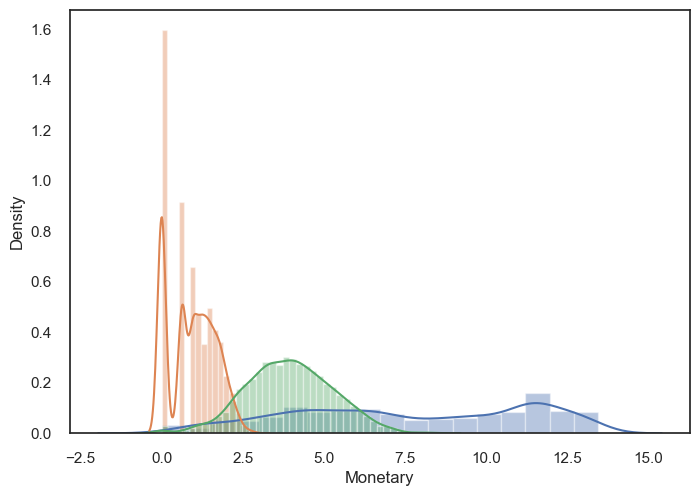

In [76]:
sns.distplot(rfm_uk['Recency'])
sns.distplot(rfm_uk['Frequency'])
sns.distplot(rfm_uk['Monetary'])

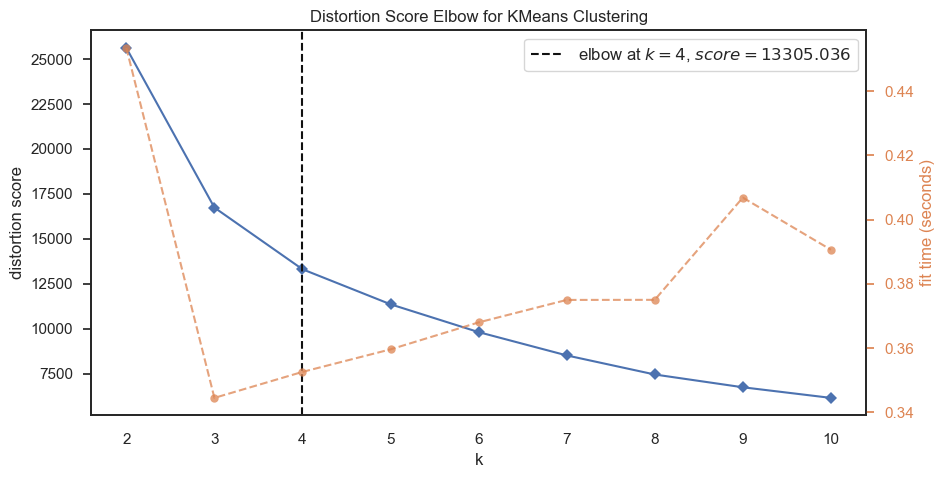

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
rfm_values = rfm_uk[["Recency","Frequency","Monetary"]]

plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(rfm_values)
Elbow_M.show()

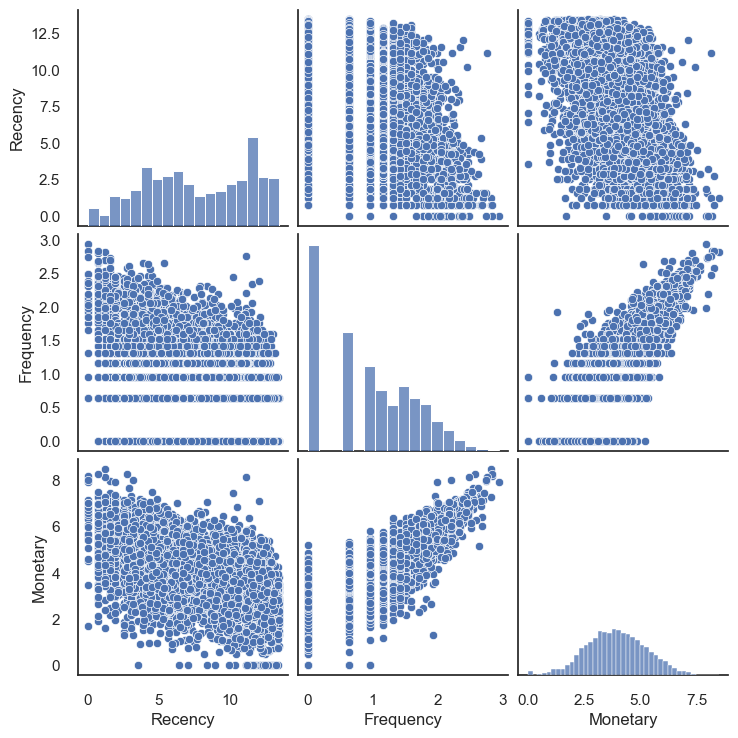

In [78]:
sns.pairplot(rfm_values)

In [79]:
# After k=4, the decrease in WCSS slows down, suggesting that adding more clusters does not significantly improve the clustering.

kmeans = KMeans(n_clusters=4, max_iter=200)
kmeans.fit(rfm_values)

KMeans(max_iter=200, n_clusters=4)

In [80]:
rfm_values['Cluster'] = kmeans.labels_

rfm_values.head()

Recency  Frequency  Monetary  Cluster
Customer ID                                         
12346.0      10.721021   1.811570  2.861451        0
12608.0      11.405955   0.000000  2.900227        0
12745.0      12.011156   0.632291  3.513283        0
12746.0      12.366186   0.000000  3.125796        0
12747.0       1.225139   2.168999  5.951795        1

In [81]:
# Centriods

kmeans.cluster_centers_

array([[11.88091322,  0.39817466,  3.026526  ],
       [ 2.53198152,  1.60333288,  5.14944772],
       [ 9.01461815,  0.92590253,  3.85487947],
       [ 5.61406007,  1.05786384,  4.18346031]])

In [82]:
cluster_avg = rfm_values.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

cluster_avg

Cluster    Recency  Frequency  Monetary
0        0  11.880459   0.398714  3.027880
1        1   2.533920   1.603248  5.150358
2        2   9.007247   0.923752  3.851064
3        3   5.611764   1.058966  4.184419

In [83]:
cluster_avg['CustomerCount'] = rfm_values.groupby('Cluster')['Frequency'].count().values

cluster_avg

Cluster    Recency  Frequency  Monetary  CustomerCount
0        0  11.880459   0.398714  3.027880           1683
1        1   2.533920   1.603248  5.150358           1042
2        2   9.007247   0.923752  3.851064           1026
3        3   5.611764   1.058966  4.184419           1602

In [84]:
# Normalize the data for the snake plot

scaler = StandardScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(cluster_avg), index=cluster_avg.index, columns=cluster_avg.columns)
rfm_normalized['Cluster'] = rfm_normalized.index

rfm_normalized

Cluster   Recency  Frequency  Monetary  CustomerCount
0        0  1.314527  -1.394072 -1.348616       1.127935
1        1 -1.343626   1.416524  1.442479      -0.969255
2        2  0.497387  -0.168977 -0.266115      -1.021603
3        3 -0.468288   0.146526  0.172252       0.862923

In [85]:
# Melt the data into a long format so each metric is in one column
rfm_melt = pd.melt(rfm_normalized.reset_index(),
                    id_vars=['Cluster'], value_vars=['Recency','Frequency','Monetary'],
                   var_name='Attribute', value_name='Value')

rfm_melt.head()

Cluster  Attribute     Value
0        0    Recency  1.314527
1        1    Recency -1.343626
2        2    Recency  0.497387
3        3    Recency -0.468288
4        0  Frequency -1.394072

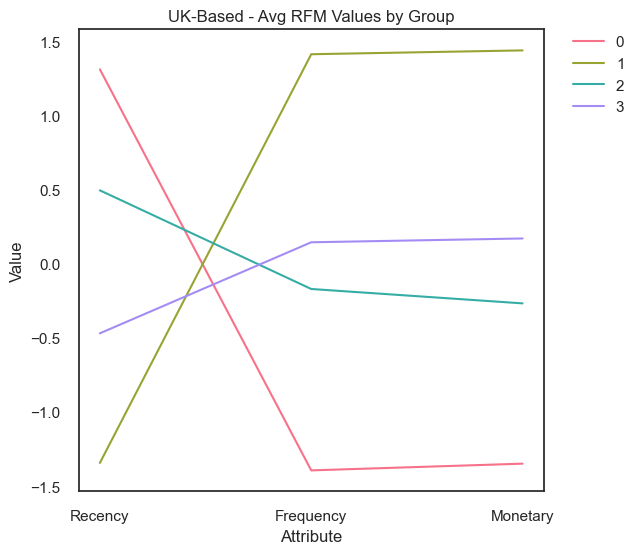

In [86]:
palette = sns.color_palette("husl", n_colors=len(rfm_melt['Cluster'].unique()))

plt.figure(figsize=(6, 6))
sns.lineplot(data=rfm_melt, x='Attribute', y='Value', hue='Cluster', palette=palette)
plt.title('UK-Based - Avg RFM Values by Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [87]:
rfm_melted = pd.melt(rfm_values, id_vars=['Cluster'], value_vars=['Recency', 'Frequency', 'Monetary'],
                     var_name='RFM', value_name='Value')

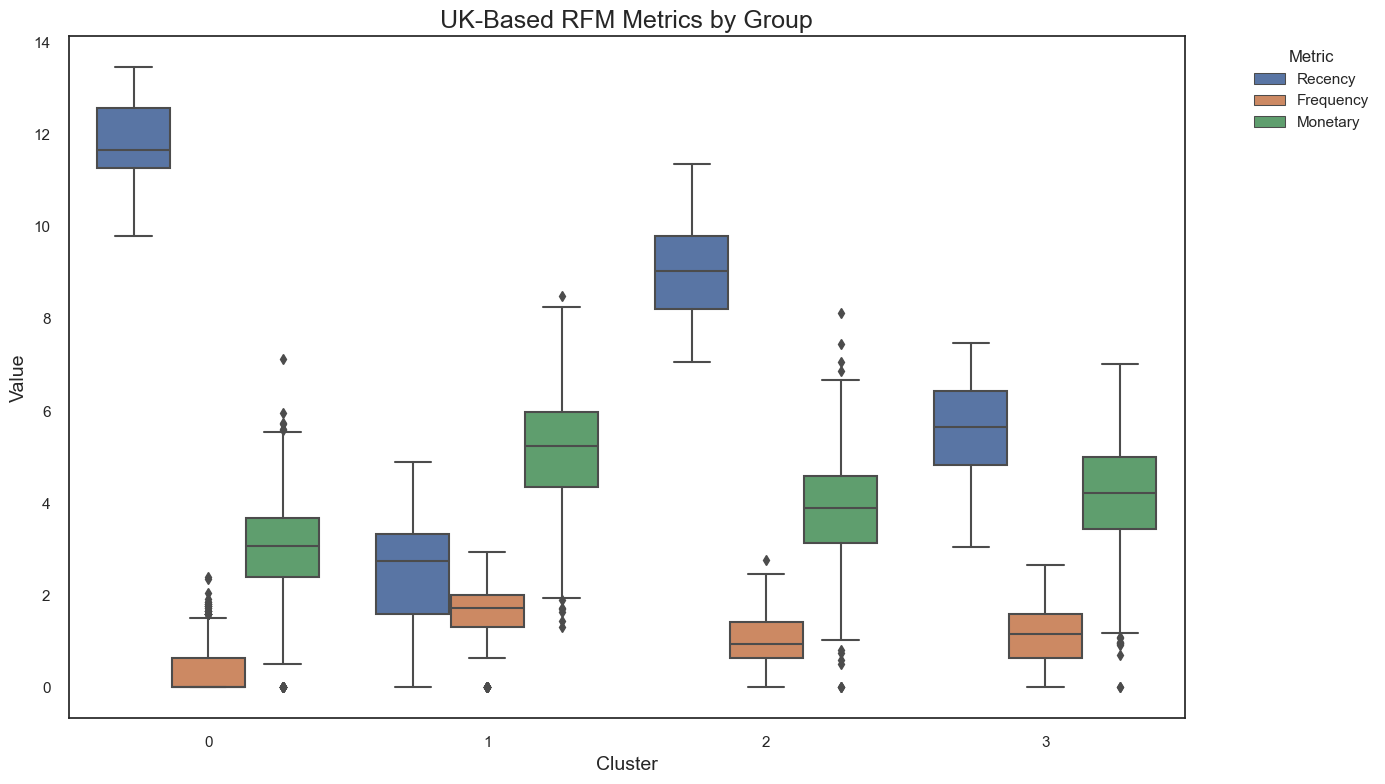

In [88]:
plt.figure(figsize=(14, 8)) 
boxplot = sns.boxplot(x="Cluster", y="Value", hue="RFM", data=rfm_melted, dodge=True)

# Enhance the aesthetics
plt.title('UK-Based RFM Metrics by Group', fontsize=18)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()


In [89]:
# silhouette score
silo_score = silhouette_score(rfm_values, kmeans.labels_)

silo_score

0.4654378391840562

Total explained variance: 0.95


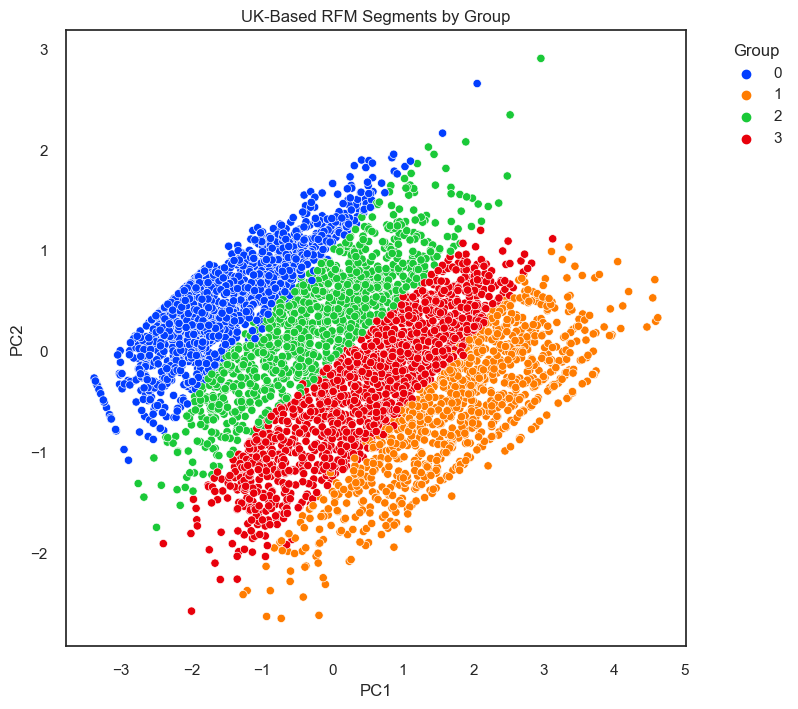

In [90]:
# standardize RFM data
features = ['Recency', 'Frequency', 'Monetary']
x = rfm_uk.loc[:, features].values
x = StandardScaler().fit_transform(x)  

pca = PCA(n_components=2)  
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, rfm_values['Cluster'].reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=finalDf, palette='bright')
plt.title('UK-Based RFM Segments by Group')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc=2)

# to interpret PCA
total_variance_explained = sum(pca.explained_variance_ratio_)

print(f"Total explained variance: {total_variance_explained:.2f}")

In [91]:
bins1 = np.linspace(rfm_values["Recency"].min(),rfm_values["Recency"].max(),6)
rfm_values["R"] = pd.cut(rfm_values["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(rfm_values["Frequency"].min(),rfm_values["Frequency"].max(),6)
rfm_values["F"] = pd.cut(rfm_values["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(rfm_values["Monetary"].min(),rfm_values["Monetary"].max(),6)
rfm_values["M"] = pd.cut(rfm_values["Monetary"],bins3,labels=[1,2,3,4,5],include_lowest=True)

In [92]:
rfm_values["RFM_Score"] = rfm_values["R"].astype(str) + rfm_values["F"].astype(str) 
rfm_values.head()

Recency  Frequency  Monetary  Cluster  R  F  M RFM_Score
Customer ID                                                            
12346.0      10.721021   1.811570  2.861451        0  2  4  2        24
12608.0      11.405955   0.000000  2.900227        0  1  1  2        11
12745.0      12.011156   0.632291  3.513283        0  1  2  3        12
12746.0      12.366186   0.000000  3.125796        0  1  1  2        11
12747.0       1.225139   2.168999  5.951795        1  5  4  4        54

In [93]:
# dictionary to store and name each segment
# frequency correlates to monetary which is why I considered 2 digits only for RFM_Score

map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can''t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_values['Segment'] = rfm_values['RFM_Score'].replace(map, regex=True)

rfm_values.head()

Recency  Frequency  Monetary  Cluster  R  F  M RFM_Score  \
Customer ID                                                               
12346.0      10.721021   1.811570  2.861451        0  2  4  2        24   
12608.0      11.405955   0.000000  2.900227        0  1  1  2        11   
12745.0      12.011156   0.632291  3.513283        0  1  2  3        12   
12746.0      12.366186   0.000000  3.125796        0  1  1  2        11   
12747.0       1.225139   2.168999  5.951795        1  5  4  4        54   

                 Segment  
Customer ID               
12346.0          At Risk  
12608.0      Hibernating  
12745.0      Hibernating  
12746.0      Hibernating  
12747.0        Champions

In [94]:
rfm_values['Segment'].unique()

array(['At Risk', 'Hibernating', 'Champions', 'Potential Loyalists',
       'About to Sleep', 'Loyal Customers', 'Need Attention', 'Promising',
       'New Customers', 'Cant Loose'], dtype=object)

In [95]:
rfm_values['Cluster'].unique()

array([0, 1, 2, 3])

In [96]:
# Segregate clusters

c1 = rfm_values[rfm_values["Cluster"]==0]
c2 = rfm_values[rfm_values["Cluster"]==1]
c3 = rfm_values[rfm_values["Cluster"]==2]
c4 = rfm_values[rfm_values["Cluster"]==3]

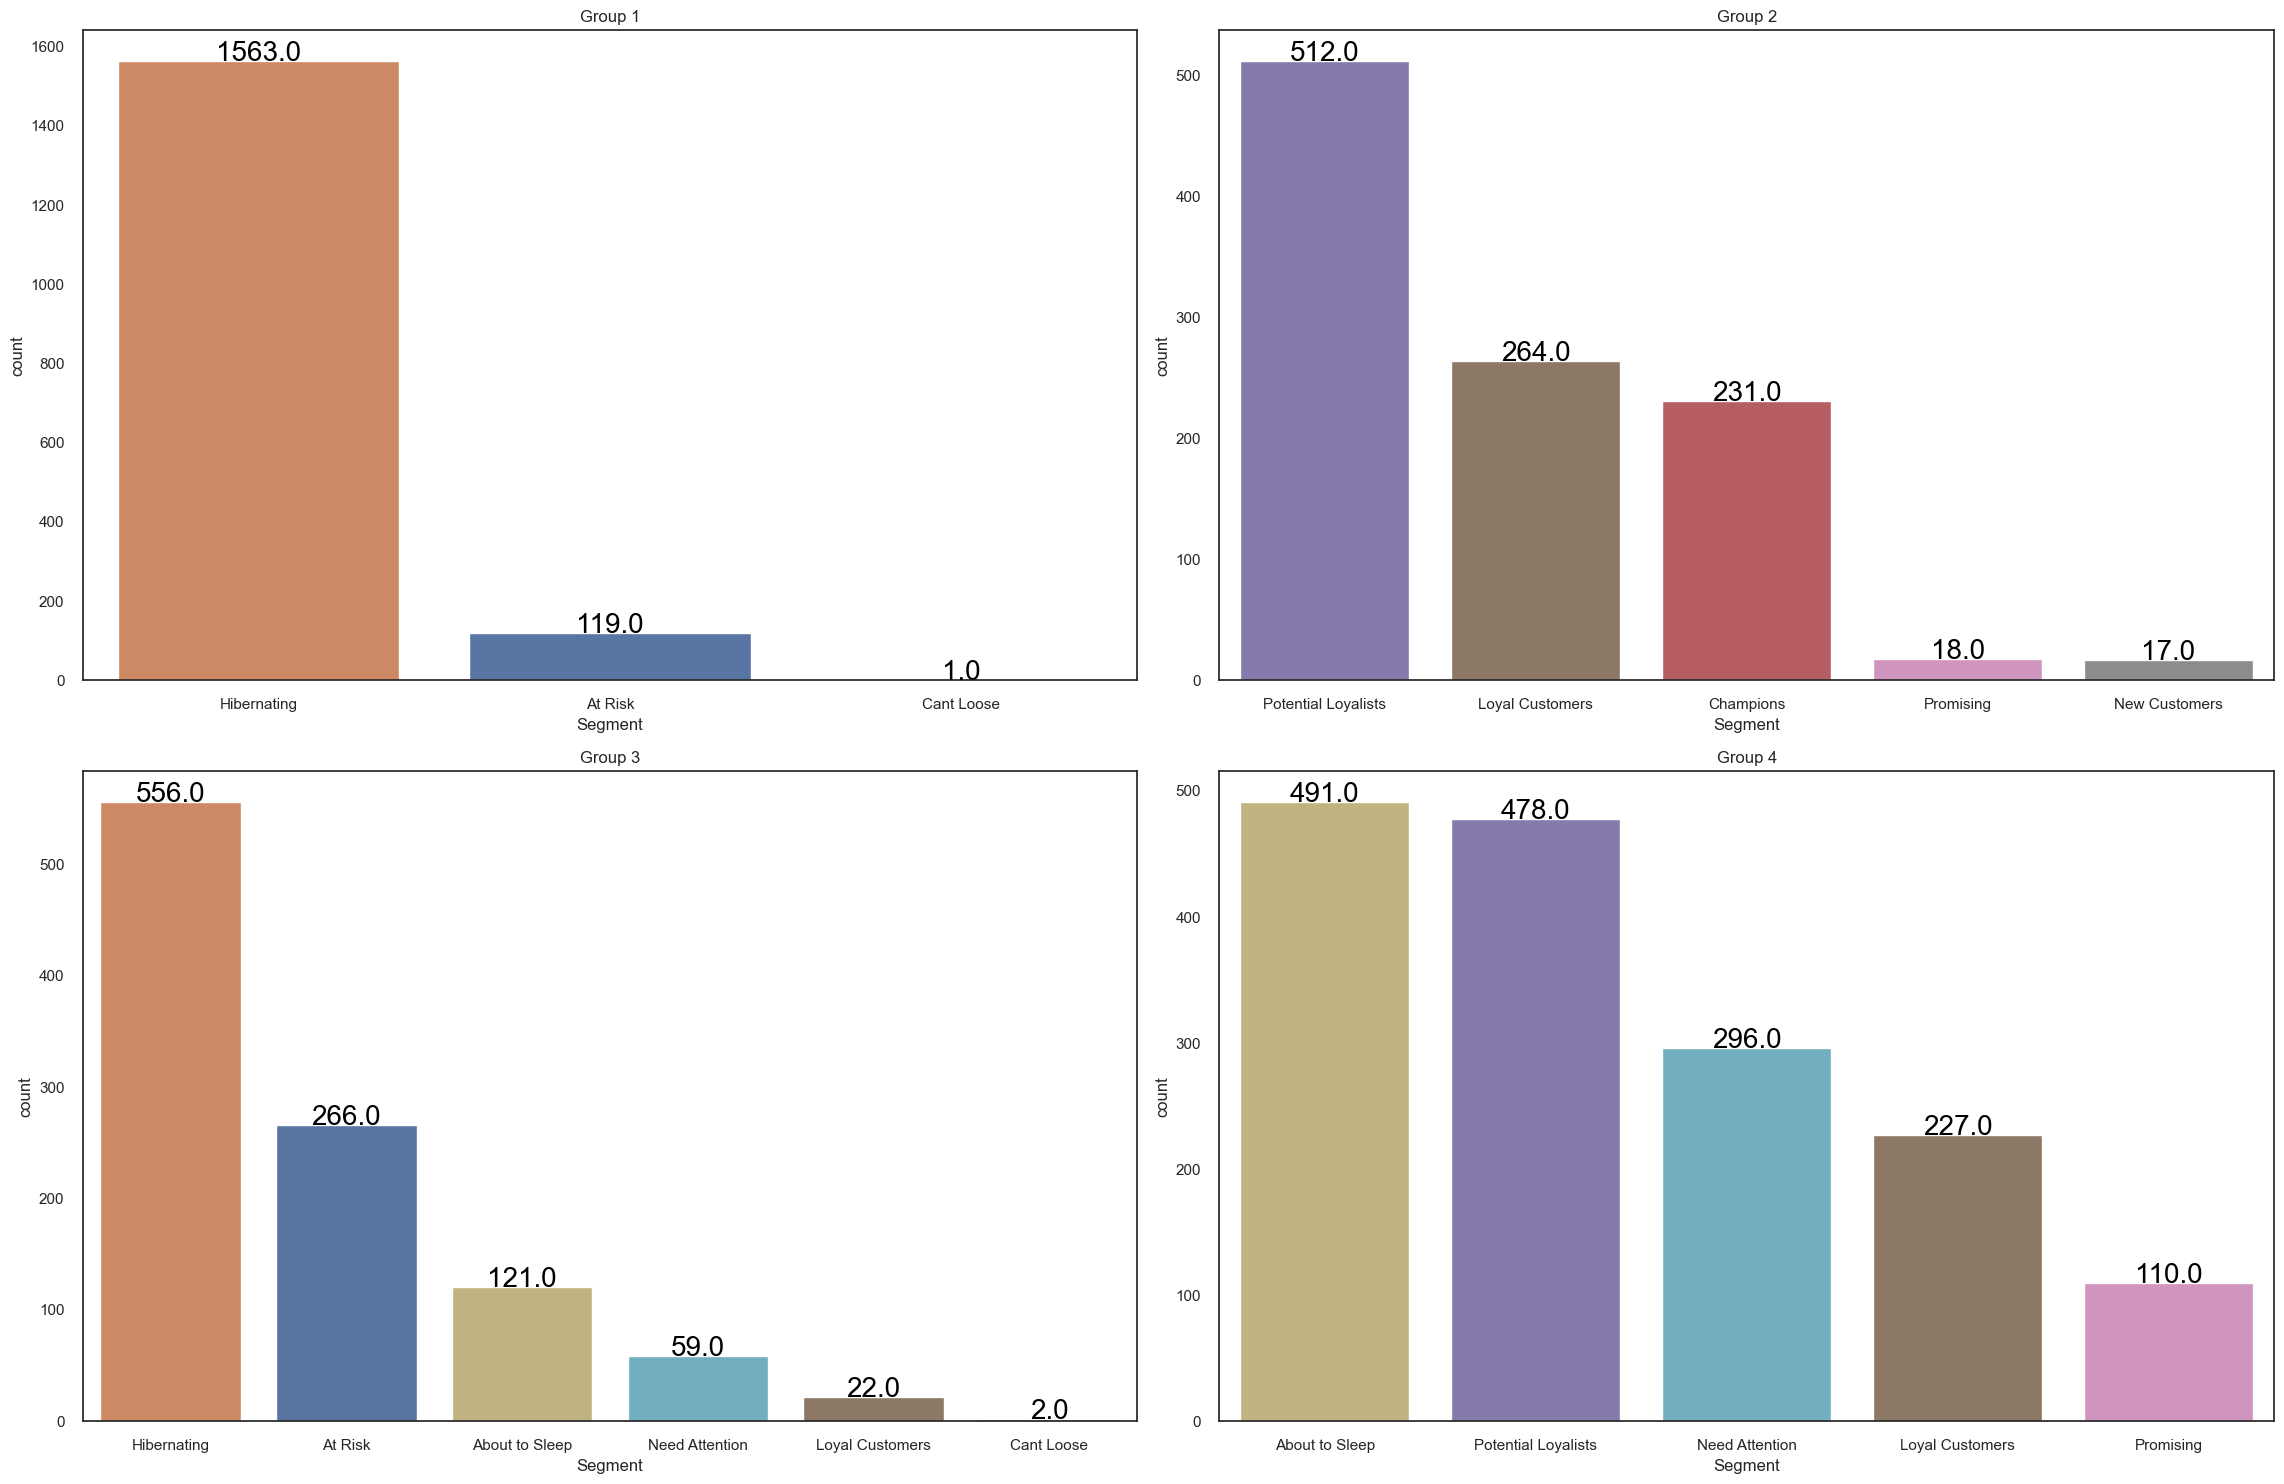

In [97]:
clusters = [c1, c2, c3, c4]  
cluster_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']  

all_segments = pd.unique(pd.concat([df['Segment'] for df in clusters]))

palette = sns.color_palette('deep', n_colors=len(all_segments))

color_mapping = {segment: color for segment, color in zip(all_segments, palette)}

plt.figure(figsize=(23, 15))

for i, cluster in enumerate(clusters):
    #  segment counts for the current cluster
    seg_counts = cluster['Segment'].value_counts().sort_values(ascending=False)

    ax = plt.subplot(2, 2, i + 1)
    
    sns.countplot(x="Segment", data=cluster, order=seg_counts.index, palette=color_mapping, ax=ax)

    ax.set_title(cluster_labels[i])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()

Text(0, 0.5, 'Frequency')

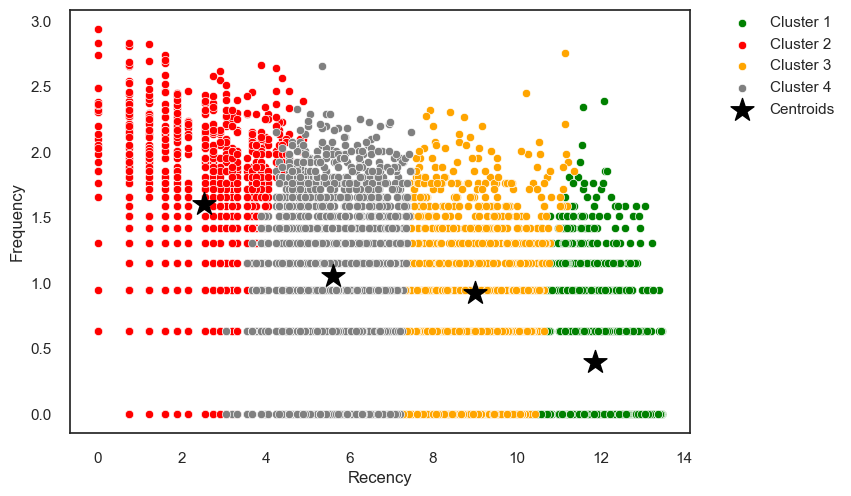

In [98]:
# each cluster
sns.scatterplot(x='Recency', y='Frequency', data=c1, label='Cluster 1', color='green')
sns.scatterplot(x='Recency', y='Frequency', data=c2, label='Cluster 2', color='red')
sns.scatterplot(x='Recency', y='Frequency', data=c3, label='Cluster 3', color='orange')
sns.scatterplot(x='Recency', y='Frequency', data=c4, label='Cluster 4', color='grey')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Recency')
plt.ylabel('Frequency')

## Non-UK Countries RFM Analysis

In [99]:
df_non_uk = df_transformed[df_transformed['Country'] != 'United Kingdom']

In [100]:
df_non_uk.head()

InvoiceDate Invoice StockCode                        Description  Quantity  \
71  2009-12-01  489439     22065     CHRISTMAS PUDDING TRINKET POT   2.054683   
72  2009-12-01  489439     22138      BAKING SET 9 PIECE RETROSPOT   1.856020   
73  2009-12-01  489439     22139  RETRO SPOT TEA SET CERAMIC 11 PC   1.856020   
74  2009-12-01  489439     22352   LUNCHBOX WITH CUTLERY RETROSPOT   2.054683   
75  2009-12-01  489439    85014A   BLACK/BLUE DOTS RUFFLED UMBRELLA  1.008447   

       Price Customer ID Country   Revenue    Month  
71  0.718093     12682.0  France  1.475453  2009-12  
72  1.167672     12682.0  France  2.167222  2009-12  
73  1.167672     12682.0  France  2.167222  2009-12  
74  0.931141     12682.0  France  1.913200  2009-12  
75  1.227382     12682.0  France  1.237749  2009-12

In [101]:
df_non_uk['Country'].unique()

array(['France', 'USA', 'Belgium', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Denmark', 'Netherlands', 'Poland', 'Channel Islands',
       'Spain', 'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Italy', 'Switzerland', 'Japan',
       'Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea',
       'Brazil', 'Canada', 'Iceland', 'Lebanon', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [102]:
rfm_nonuk = df_non_uk.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'Invoice': lambda x: x.nunique(),  # Frequency
    'Revenue': lambda x: x.sum()  # Monetary
}).rename(columns={'InvoiceDate': 'Recency',
                   'Invoice': 'Frequency', 
                   'Revenue': 'Monetary'})
rfm_nonuk.head()

Recency  Frequency    Monetary
Customer ID                                
12347.0            3          8  319.242285
12348.0           76          5   56.644011
12349.0           19          4  232.732603
12350.0          311          1   23.658754
12351.0          376          1   24.635817

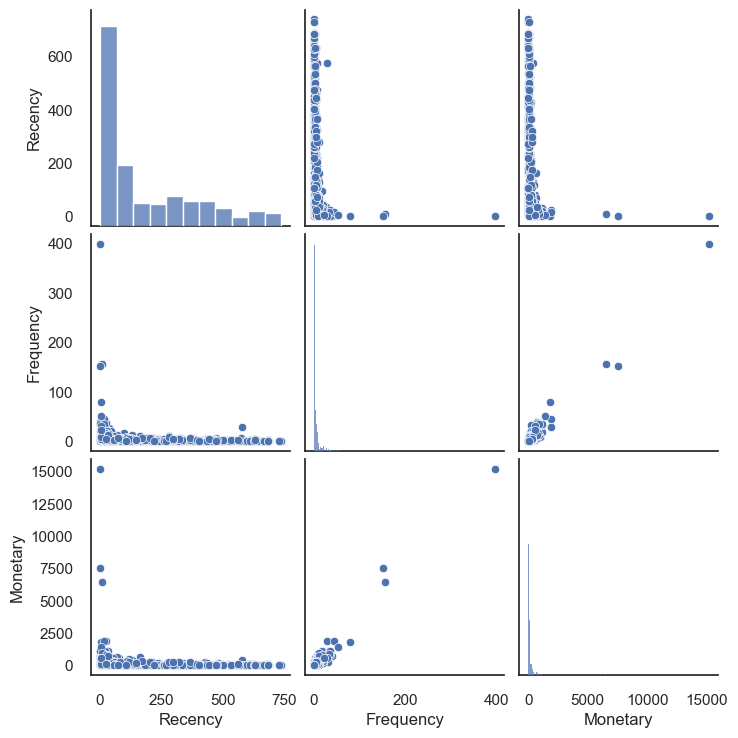

In [103]:
sns.pairplot(rfm_nonuk)

<Axes: xlabel='Recency', ylabel='Density'>

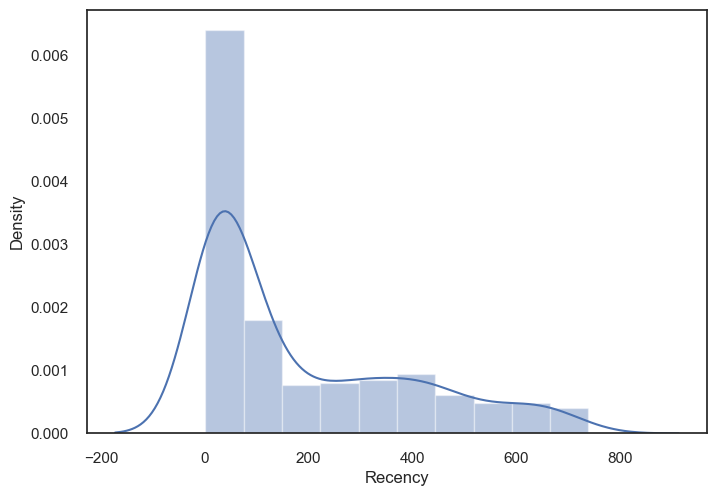

In [104]:
sns.distplot(rfm_nonuk['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

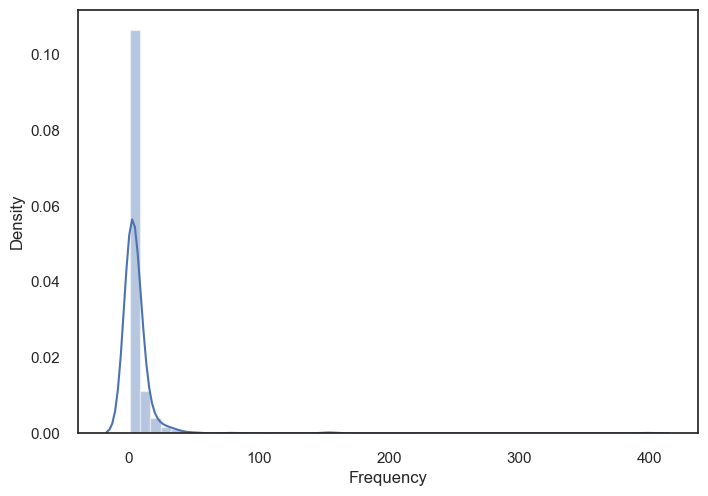

In [105]:
sns.distplot(rfm_nonuk['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

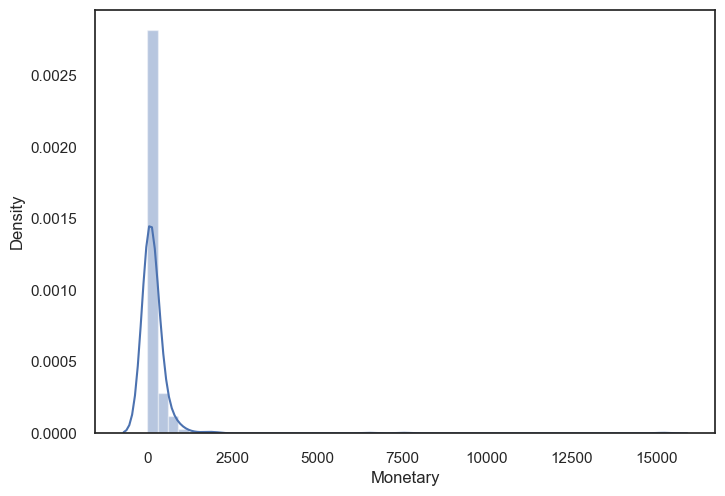

In [106]:
sns.distplot(rfm_nonuk['Monetary'])

In [107]:
skewed_columns2 = ['Recency', 'Frequency', 'Monetary']

for col in skewed_columns2:
    rfm_nonuk[col] = rfm_nonuk[col] + 1 - rfm_nonuk[col].min()

    # Box-Cox 
    rfm_nonuk[f"{col}_BoxCox"], fitted_lambda = stats.boxcox(rfm_nonuk[col])
    print(f"Fitted Lambda for {col}: {fitted_lambda}")
    # A lambda value close to 1 indicates that little transformation was needed while values far from 1 indicate more extreme transformations.

Fitted Lambda for Recency: 0.1616491661410518
Fitted Lambda for Frequency: -0.32860551812616506
Fitted Lambda for Monetary: 0.04693293129977061


In [108]:
rfm_nonuk.head()

Recency  Frequency    Monetary  Recency_BoxCox  Frequency_BoxCox  \
Customer ID                                                                     
12347.0            3          8  320.242285        1.202204          1.506548   
12348.0           76          5   57.644011        6.272055          1.249917   
12349.0           19          4  233.732603        3.770935          1.113484   
12350.0          311          1   24.658754        9.458893          0.000000   
12351.0          376          1   25.635817        9.946331          0.000000   

             Monetary_BoxCox  
Customer ID                   
12347.0             6.625626  
12348.0             4.465685  
12349.0             6.215840  
12350.0             3.458756  
12351.0             3.503964

In [109]:
rfm_nonuk.drop(['Recency', 'Frequency', 'Monetary'], axis=1, inplace=True)

In [110]:
rfm_nonuk.columns = rfm_nonuk.columns.str.replace('_BoxCox', '')

rfm_nonuk.head()

Recency  Frequency  Monetary
Customer ID                               
12347.0      1.202204   1.506548  6.625626
12348.0      6.272055   1.249917  4.465685
12349.0      3.770935   1.113484  6.215840
12350.0      9.458893   0.000000  3.458756
12351.0      9.946331   0.000000  3.503964

<Axes: xlabel='Monetary', ylabel='Density'>

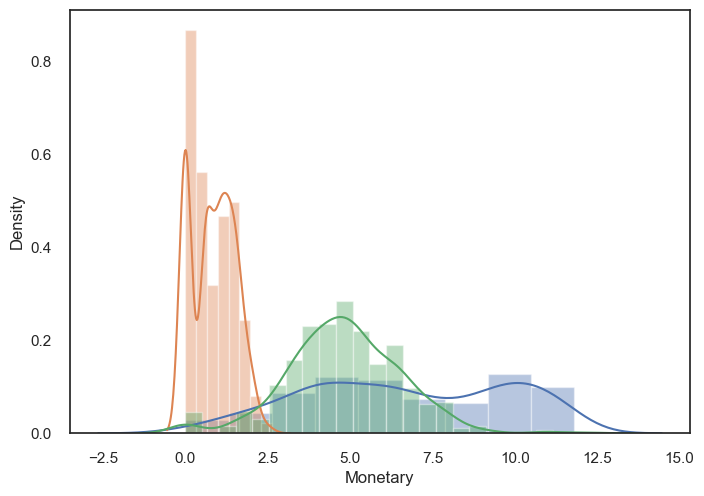

In [111]:
sns.distplot(rfm_nonuk['Recency'])
sns.distplot(rfm_nonuk['Frequency'])
sns.distplot(rfm_nonuk['Monetary'])

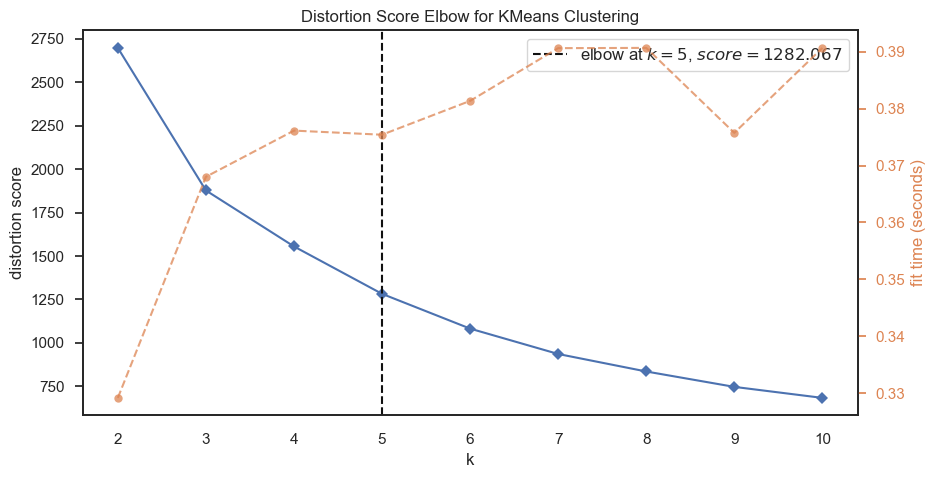

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
rfm_values2 = rfm_nonuk[["Recency","Frequency","Monetary"]]

plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(rfm_values2)
Elbow_M.show()

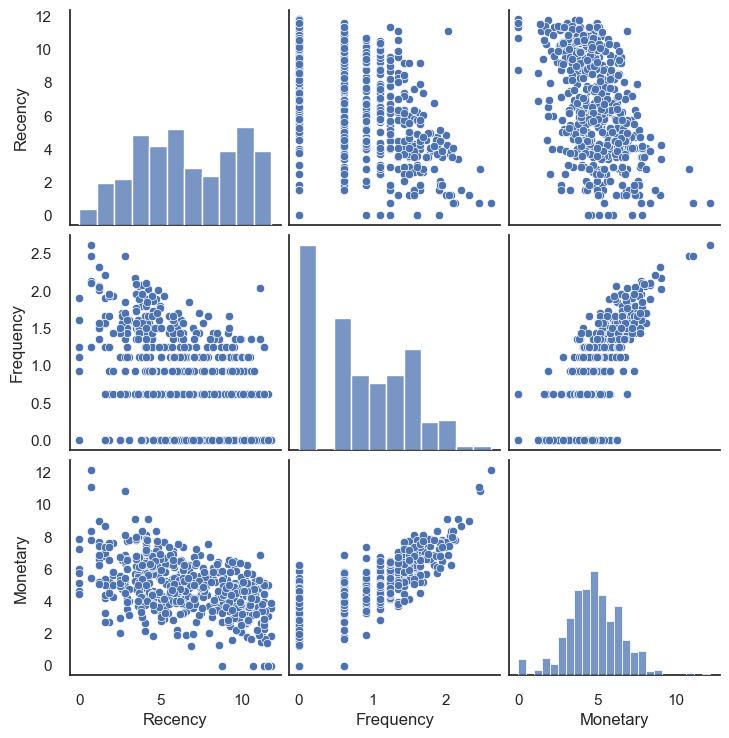

In [113]:
sns.pairplot(rfm_values2)

In [114]:
# After k=4, the decrease in WCSS slows down, suggesting that adding more clusters does not significantly improve the clustering.

kmeans2 = KMeans(n_clusters=5, max_iter=200)
kmeans2.fit(rfm_values2)

KMeans(max_iter=200, n_clusters=5)

In [115]:
rfm_values2['Cluster'] = kmeans2.labels_

rfm_values2.head()

Recency  Frequency  Monetary  Cluster
Customer ID                                        
12347.0      1.202204   1.506548  6.625626        2
12348.0      6.272055   1.249917  4.465685        1
12349.0      3.770935   1.113484  6.215840        2
12350.0      9.458893   0.000000  3.458756        3
12351.0      9.946331   0.000000  3.503964        0

In [116]:
# Centriods

kmeans2.cluster_centers_

array([[10.54228742,  0.10169364,  2.39062247],
       [ 6.34873314,  0.85828536,  4.9833632 ],
       [ 3.30054281,  1.69822409,  7.14084811],
       [ 9.70086955,  0.67913064,  4.67771887],
       [ 3.12388043,  0.79954004,  4.40069587]])

In [117]:
cluster_avg2 = rfm_values2.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

cluster_avg2

Cluster    Recency  Frequency  Monetary
0        0  10.542287   0.101694  2.390622
1        1   6.348733   0.858285  4.983363
2        2   3.300543   1.698224  7.140848
3        3   9.700870   0.679131  4.677719
4        4   3.123880   0.799540  4.400696

In [118]:
cluster_avg2['CustomerCount'] = rfm_values2.groupby('Cluster')['Frequency'].count().values

cluster_avg2

Cluster    Recency  Frequency  Monetary  CustomerCount
0        0  10.542287   0.101694  2.390622             78
1        1   6.348733   0.858285  4.983363            146
2        2   3.300543   1.698224  7.140848             93
3        3   9.700870   0.679131  4.677719            123
4        4   3.123880   0.799540  4.400696             89

In [119]:
# Normalize the data for the snake plot

scaler2 = StandardScaler()
rfm_normalized2 = pd.DataFrame(scaler2.fit_transform(cluster_avg2), index=cluster_avg2.index, columns=cluster_avg2.columns)
rfm_normalized2['Cluster'] = rfm_normalized2.index

rfm_normalized2

Cluster   Recency  Frequency  Monetary  CustomerCount
0        0  1.268807  -1.418440 -1.537759      -1.110969
1        1 -0.081987   0.060419  0.174854       1.606510
2        2 -1.063846   1.702191  1.599963      -0.511526
3        3  0.997776  -0.289763 -0.027037       0.687362
4        4 -1.120751  -0.054407 -0.210022      -0.671377

In [120]:
# Melt the data into a long format so each metric is in one column
rfm_melt2 = pd.melt(rfm_normalized2.reset_index(),
                    id_vars=['Cluster'], value_vars=['Recency','Frequency','Monetary'],
                   var_name='Attribute', value_name='Value')

rfm_melt2.head()

Cluster Attribute     Value
0        0   Recency  1.268807
1        1   Recency -0.081987
2        2   Recency -1.063846
3        3   Recency  0.997776
4        4   Recency -1.120751

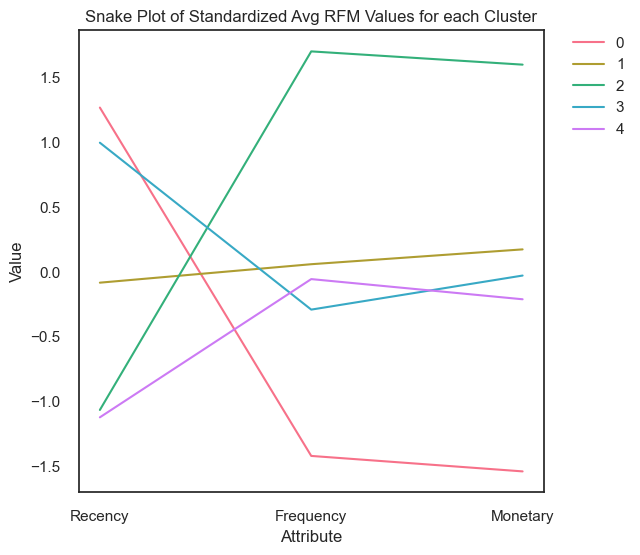

In [121]:
palette = sns.color_palette("husl", n_colors=len(rfm_melt2['Cluster'].unique()))

plt.figure(figsize=(6, 6))
sns.lineplot(data=rfm_melt2, x='Attribute', y='Value', hue='Cluster', palette=palette)
plt.title('Snake Plot of Standardized Avg RFM Values for each Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Text(0.5, 1.0, 'Recency v/s Clusters')

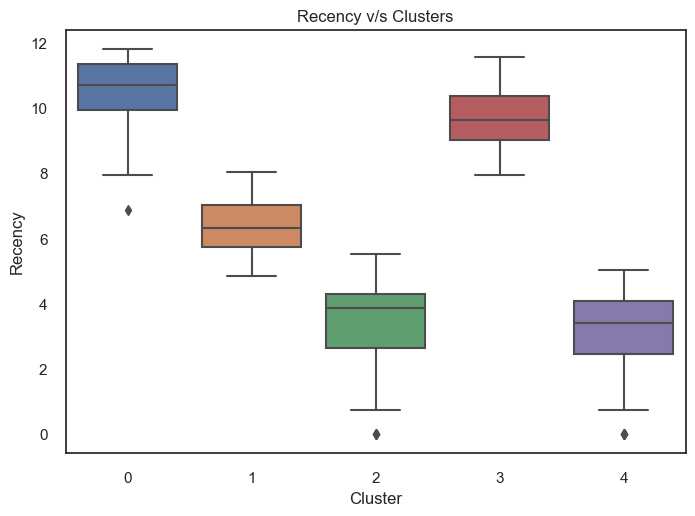

In [122]:
sns.boxplot(x="Cluster",y="Recency",data=rfm_values2).set_title("Recency v/s Clusters")

Text(0.5, 1.0, 'Frequency v/s Clusters')

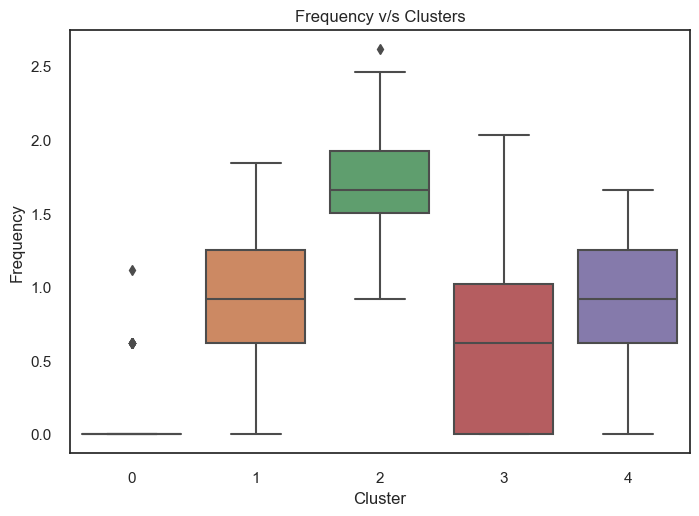

In [123]:
sns.boxplot(x="Cluster",y="Frequency",data=rfm_values2).set_title("Frequency v/s Clusters")

Text(0.5, 1.0, 'Monetary v/s Clusters')

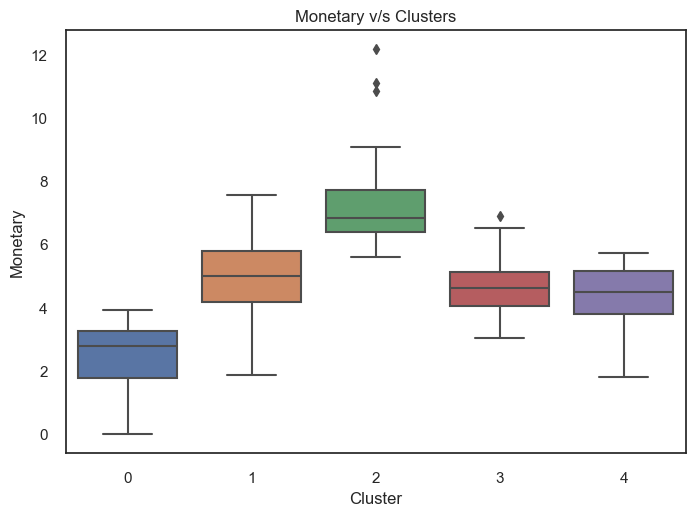

In [124]:
sns.boxplot(x="Cluster",y="Monetary",data=rfm_values2).set_title("Monetary v/s Clusters")

In [125]:
# silhouette score
silo_score2 = silhouette_score(rfm_values2, kmeans2.labels_)

silo_score2

0.48811534259245254

Total explained variance: 0.95


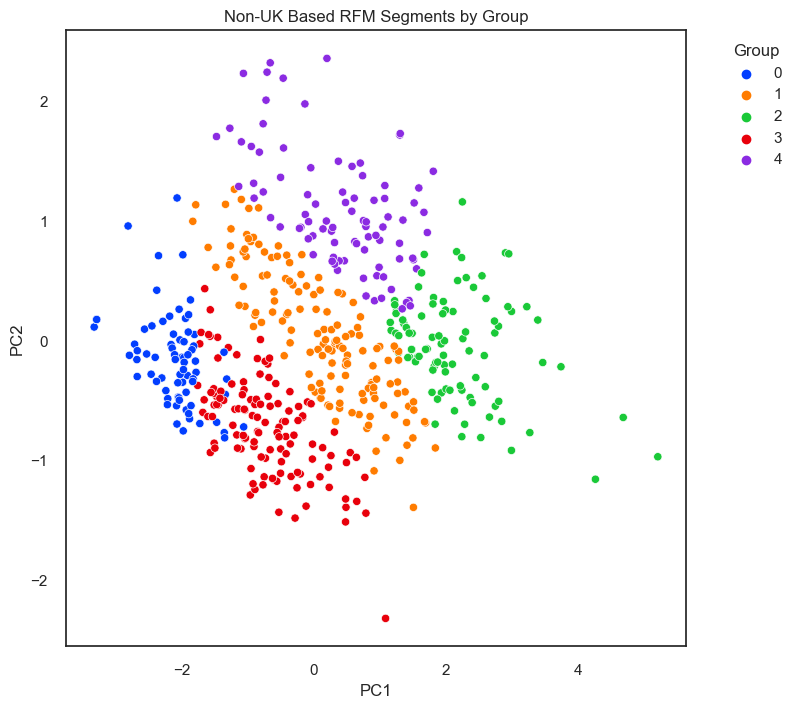

In [126]:
# standardize RFM data
features2 = ['Recency', 'Frequency', 'Monetary']
x = rfm_nonuk.loc[:, features2].values
x = StandardScaler().fit_transform(x)  

pca2 = PCA(n_components=2)  
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data=principalComponents2, columns=['PC1', 'PC2'])

finalDf2 = pd.concat([principalDf2, rfm_values2['Cluster'].reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=finalDf2, palette='bright')
plt.title('Non-UK Based RFM Segments by Group')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc=2)

# to interpret PCA
total_variance_explained2 = sum(pca.explained_variance_ratio_)

print(f"Total explained variance: {total_variance_explained:.2f}")

In [127]:
bins01 = np.linspace(rfm_values2["Recency"].min(),rfm_values2["Recency"].max(),6)
rfm_values2["R"] = pd.cut(rfm_values2["Recency"],bins01,labels=[5,4,3,2,1],include_lowest=True)

bins02 = np.linspace(rfm_values2["Frequency"].min(),rfm_values2["Frequency"].max(),6)
rfm_values2["F"] = pd.cut(rfm_values2["Frequency"],bins02,labels=[1,2,3,4,5],include_lowest=True)

bins03 = np.linspace(rfm_values2["Monetary"].min(),rfm_values2["Monetary"].max(),6)
rfm_values2["M"] = pd.cut(rfm_values2["Monetary"],bins03,labels=[1,2,3,4,5],include_lowest=True)

In [128]:
rfm_values2["RFM_Score"] = rfm_values2["R"].astype(str) + rfm_values2["F"].astype(str) 
rfm_values2.head()

Recency  Frequency  Monetary  Cluster  R  F  M RFM_Score
Customer ID                                                           
12347.0      1.202204   1.506548  6.625626        2  5  3  3        53
12348.0      6.272055   1.249917  4.465685        1  3  3  2        33
12349.0      3.770935   1.113484  6.215840        2  4  3  3        43
12350.0      9.458893   0.000000  3.458756        3  1  1  2        11
12351.0      9.946331   0.000000  3.503964        0  1  1  2        11

In [129]:
# dictionary to store and name each segment
# frequency correlates to monetary which is why I considered 2 digits only for RFM_Score

map2 = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can''t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_values2['Segment'] = rfm_values2['RFM_Score'].replace(map, regex=True)

rfm_values2.head()

Recency  Frequency  Monetary  Cluster  R  F  M RFM_Score  \
Customer ID                                                              
12347.0      1.202204   1.506548  6.625626        2  5  3  3        53   
12348.0      6.272055   1.249917  4.465685        1  3  3  2        33   
12349.0      3.770935   1.113484  6.215840        2  4  3  3        43   
12350.0      9.458893   0.000000  3.458756        3  1  1  2        11   
12351.0      9.946331   0.000000  3.503964        0  1  1  2        11   

                         Segment  
Customer ID                       
12347.0      Potential Loyalists  
12348.0           Need Attention  
12349.0      Potential Loyalists  
12350.0              Hibernating  
12351.0              Hibernating

In [130]:
rfm_values2['Cluster'].unique()

array([2, 1, 3, 0, 4])

In [131]:
# Segregate clusters

clust1 = rfm_values2[rfm_values2["Cluster"]==0]
clust2 = rfm_values2[rfm_values2["Cluster"]==1]
clust3 = rfm_values2[rfm_values2["Cluster"]==2]
clust4 = rfm_values2[rfm_values2["Cluster"]==3]
clust5 = rfm_values2[rfm_values2["Cluster"]==4]

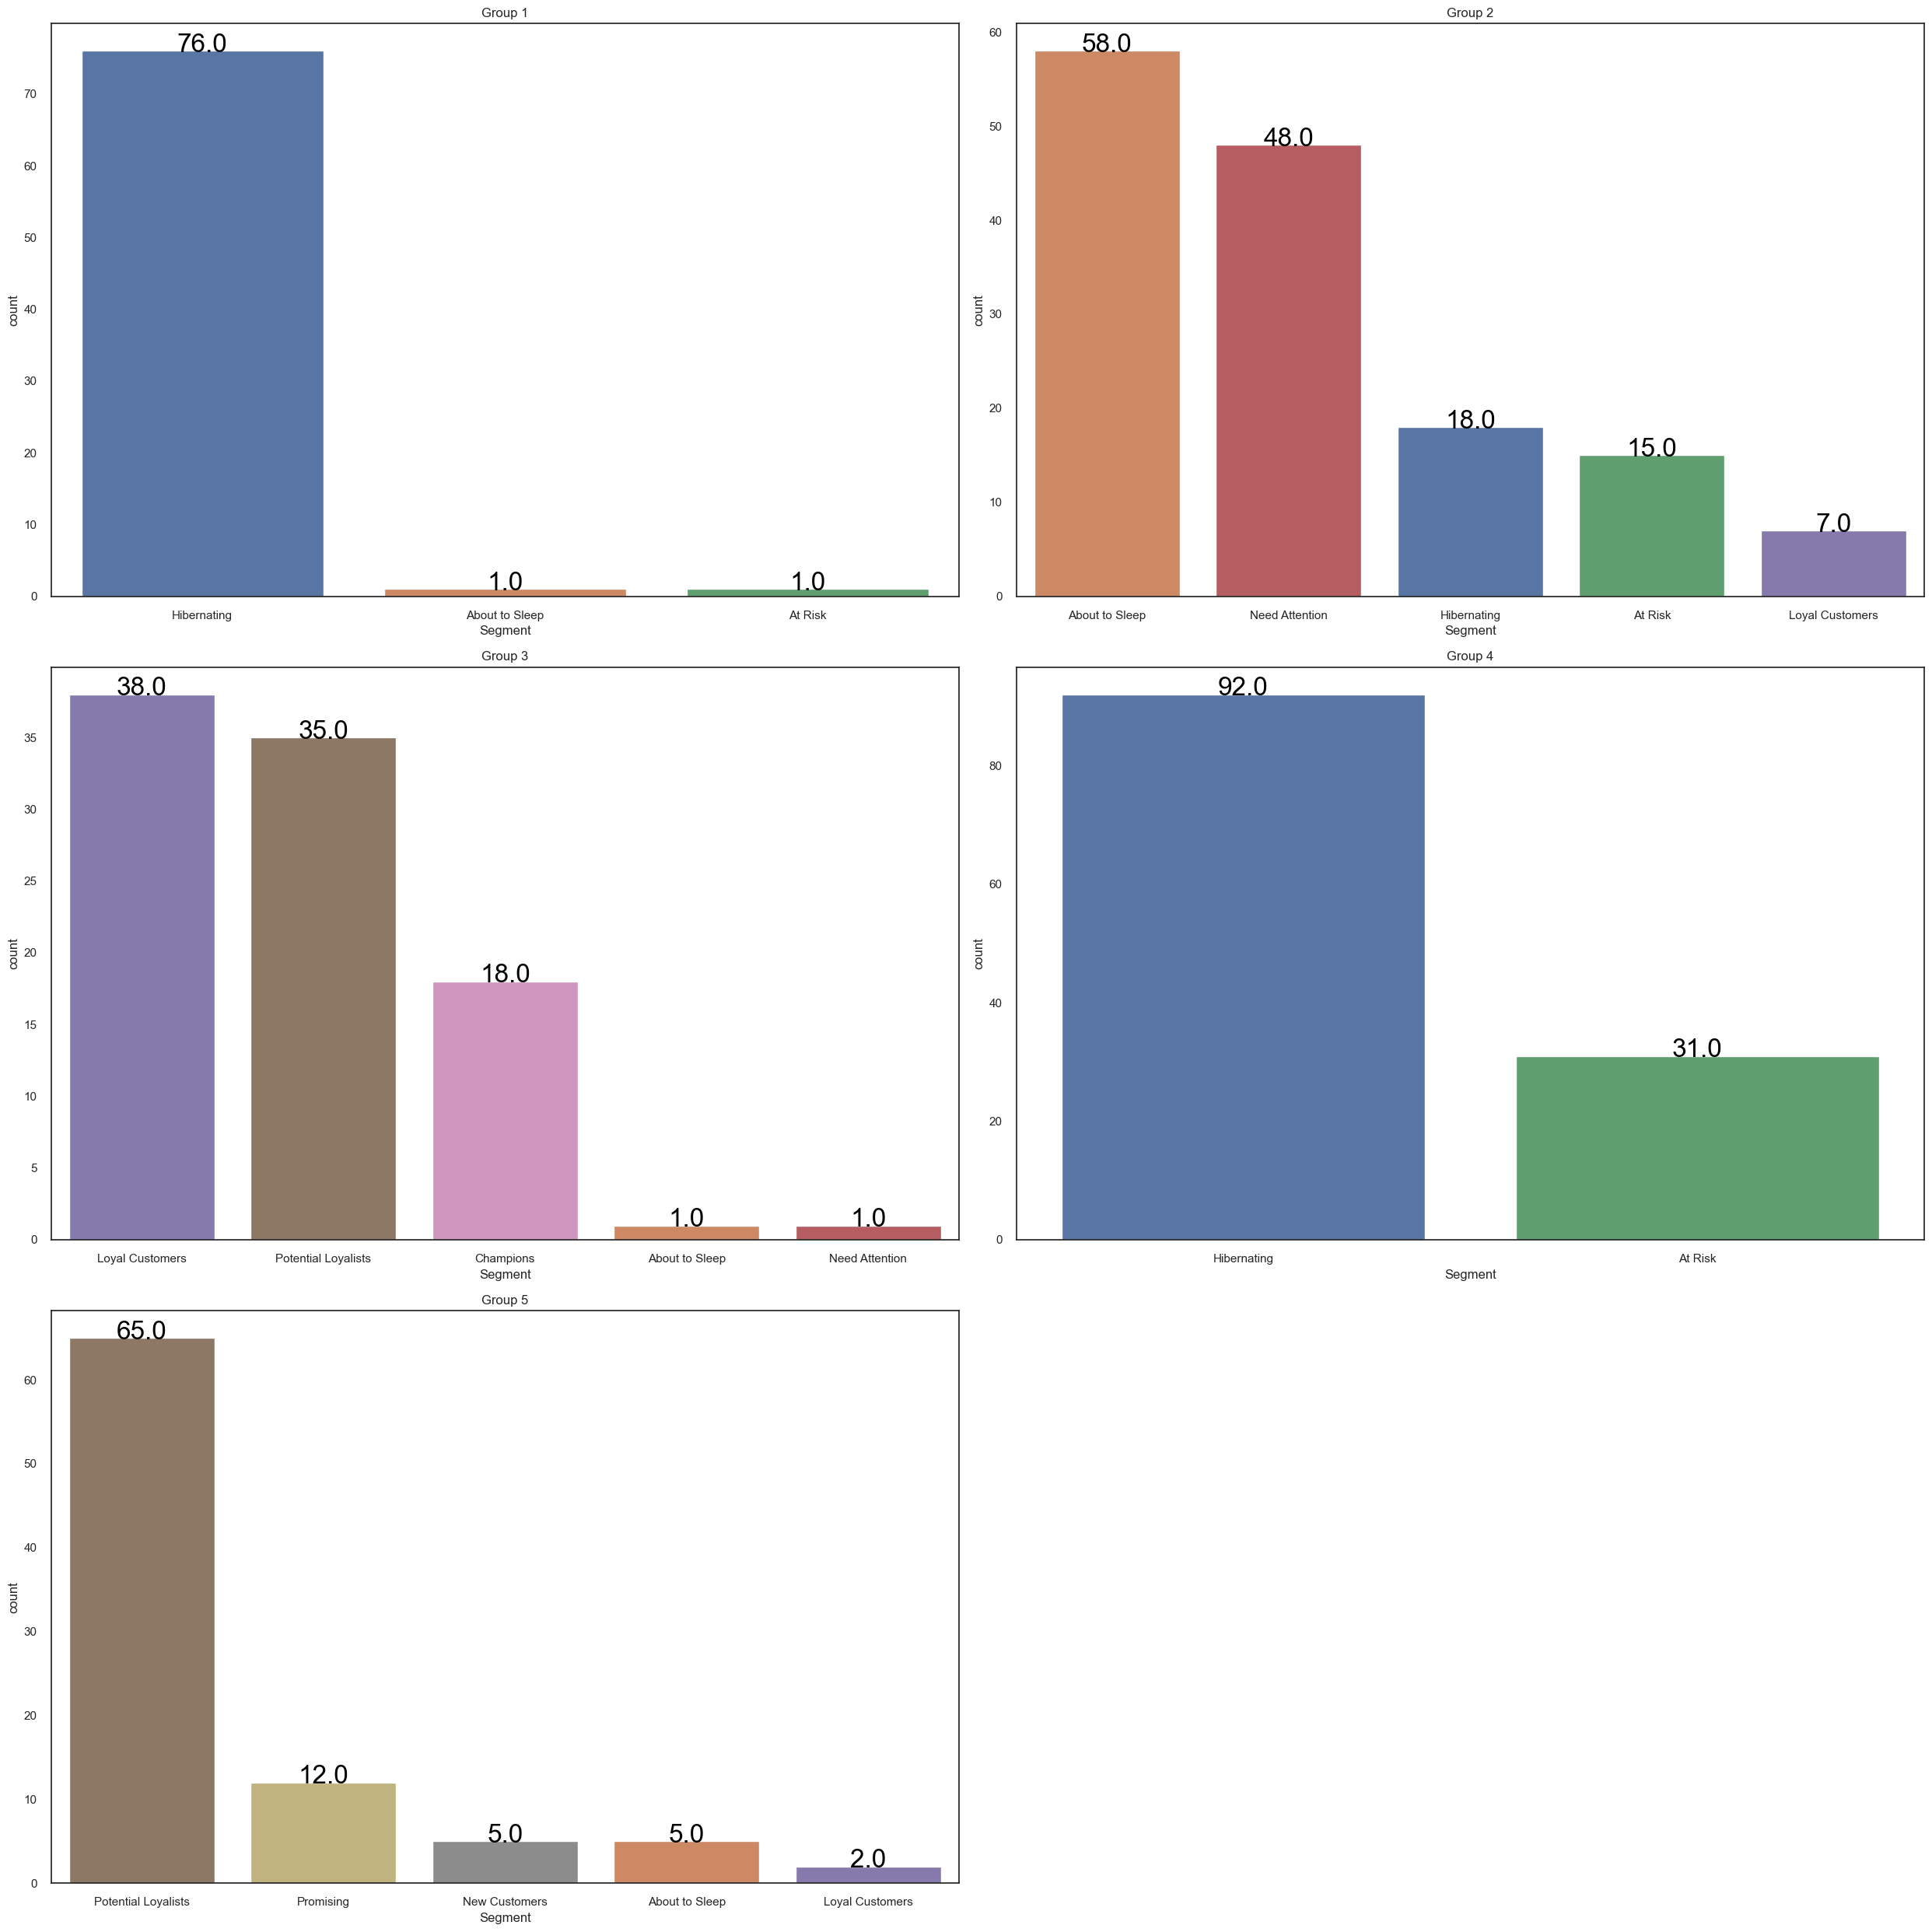

In [132]:
clusters = [clust1, clust2, clust3, clust4, clust5] 
cluster_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']  

plt.figure(figsize=(25, 25))  

for i, cluster in enumerate(clusters):

    seg_counts = cluster['Segment'].value_counts().sort_values(ascending=False)

    all_segments = pd.unique(pd.concat([df['Segment'] for df in clusters]))

    palette = sns.color_palette('deep', n_colors=len(all_segments))

    color_mapping = {segment: color for segment, color in zip(all_segments, palette)}

    ax = plt.subplot(3, 2, i + 1)
    
    sns.countplot(x="Segment", data=cluster, order=seg_counts.index, palette=color_mapping, ax=ax)
  
    ax.set_title(cluster_labels[i])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=24, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()

Text(0, 0.5, 'Frequency')

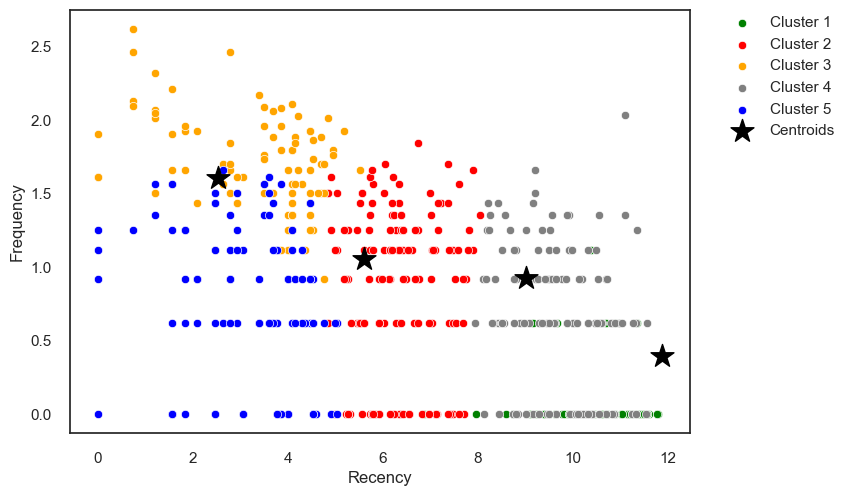

In [133]:
# each cluster
sns.scatterplot(x='Recency', y='Frequency', data=clust1, label='Cluster 1', color='green')
sns.scatterplot(x='Recency', y='Frequency', data=clust2, label='Cluster 2', color='red')
sns.scatterplot(x='Recency', y='Frequency', data=clust3, label='Cluster 3', color='orange')
sns.scatterplot(x='Recency', y='Frequency', data=clust4, label='Cluster 4', color='grey')
sns.scatterplot(x='Recency', y='Frequency', data=clust5, label='Cluster 5', color='blue')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Recency')
plt.ylabel('Frequency')

## Results Discussion:

- Time series forecasting indicates a strong seasonal pattern. The model predicts a similar pattern to continue into the future year with high confidence.

- The RFM analysis has revealed key customer groups, each with distinct behaviors. The UK market, while high in transactions, shows smaller average spending. The international segments contribute less in volume but more in transaction size.

UK-Based: Loyal Customers and Potential Loyalists represent significant segments, suggesting the value in improving these relationships.

Non-UK-Based: There's a prevalence of Hibernating and At Risk segments, highlighting a need for re-engagement strategies.

- Actionable Strategies:
The RFM guide below provides clear, actionable tips for each segment, and we will leverage these to deliver tailored marketing efforts and communication strategies, ensuring our retail store thrives in the competitive market.


## Take Action:

- Champions: Reward them. Will promote your business.

- Loyal Customers: Upsell higher value products. Ask for reviews. Engage them.

- Potential Loyalist: Offer membership/loyalty program, recommend other products. 

- New/Recent Customers: Provide unboarding support, give them early success, start building relationships.

- Promising: Create brand awareness, offer free trials.

- Need Attention: Make limited time offers, recommend based on past purchases. Reactivate them. 

- About to sleep: Share valuable resources, recommend popular products/renewals at discount, reconnect with them.

- At Risk: Send personallized emails to reconnect, offer renewals, provide helpful resources.

- Can't lose them: Win them back via renewals, or newer products, don't lose them to competition, talk to them.

- Hibernating: Offer other relevant products and special discounts. Recreate brand value.